## Heart Disease Diagnostic- Analysis

### Introduction- Internship iNeuron Project

Project Title: __Heart Disease Diagnostic- Analysis__

Technologies: __Business Intelligence__

Domain: __Healthcare__

Author: Priyanka Tanpure

### 1. Business Task

Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to do the research, analyze this health and medical data for better future preparation.

### 1.1 Business Objectives

- Performing EDA through Python and find insights.
- Extract various information such as Heart disease rates, Heart disease by - gender, by age.
- Compare attributes of the dataset to extract necessary information.
- Make Dashboard with extracted information from data.
- Find key metrics and factors and show relationship between attributes.

### 1.2 Deliverables

1. A clear summary of the business task.
2. A description of dataset used.
3. Documentation of any data cleaning or manipulation.
4. A summary of analysis.
5. Visualizations and Key findings.

### 2. Raw Dataset

The Dataset used was provided in the Project Description Document, iNeuron.

### 2.1 Understanding Dataset

Dataset description link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Only 14 Attributes are used:

1. __age__: in years

2. __sex__: 2 Values _(1 = male, 0 = female)_
                  
3. __chest pain type__: 4 values _(Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)_
                              
4. __trestbps__: resting bloop pressure _(in mm Hg on admission to the hospital)_

5. __chol__: serum cholestrol in mg/dl

6. __fbs__: (fasting blood sugar > 120 mg/dl), (1 = true, 0 = false)
        
7. __restecg__: resting electrocardigraphic results: _(Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV, Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)_

8. __thalach__: maximum heart rate achieved

9. __exang__: exercise include angina _(1 = yes, 0 = no)_

10. __oldpeak__: ST depression induced by exercise relative to rest

11. __slope__: the slope of the peak exercise ST segment _(Value 1: upsloping, Value 2: flat, Value 3: downsloping)_

12. __ca__: number of major vessels (0-3) colored by flourosopy

13. __thal__: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. __num__: __the predicted attribute__ diagnosis of heart disease (angiographic disease status) _(Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing __i.e. 0 = no (no presence of heart disease), 1 = yes (presence of heart disease)__)_

### 3. Data Preparing And Processing

Using Python for preparing and processing the data. 

####  3.1 Preparing The Environment

Filtering out warnings, Importing important libraries, Displaying maximum rows and columns.

In [1]:
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Displaying maximum rows and columns
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

#### 3.2 Loading Data

In [2]:
# Loading the Dataset
data_hdda = pd.read_csv(r'F:\Priya\Courses\iNeuron\Heart Disease Diagnostic Analysis\DATA\heart_disease_dataset.csv')
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
# Checking the Shape of Dataset
data_hdda.shape

(303, 14)

#### 3.3 Data Handling And Cleaning 

Making sure that there are no **missing values** or **incorrect data types** before analyzing the data.

For Missing Values:

1. Dropping the rows containing the missing values
2. Imputing the missing values
3. Keep the missing values if they don't affect the analysis

For Incorrect Data Types:

1. Clean certain values
2. Clean and convert an entire column

###### 3.3.1 Checking Data Type

In [4]:
# Checking the data types of the attributes
data_hdda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


__OBSERVATION:__ 

Data Type available in the dataset: Numerical Data(like int64, float64 types).

###### 3.3.2 Checking Numerical Columns

In [5]:
# Checking the quantitative spread of the attributes/columns of the dataset
data_hdda.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


##### 3.3.3 Finding the Null /Missing Values

In [6]:
# Checking the null/missing values in the data
data_hdda.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

__OBSERVATION:__ 

No Null/Missing Values are present in the dataset.

###### 3.3.4 Checking Duplicate Values

In [7]:
# Checking Duplicates in dataset
#data_hdda.duplicated()
data_hdda.duplicated().sum()

0

__OBSERVATION:__ 

No Duplicates are present in the data.

##### 3.3.5 Checking Outliers

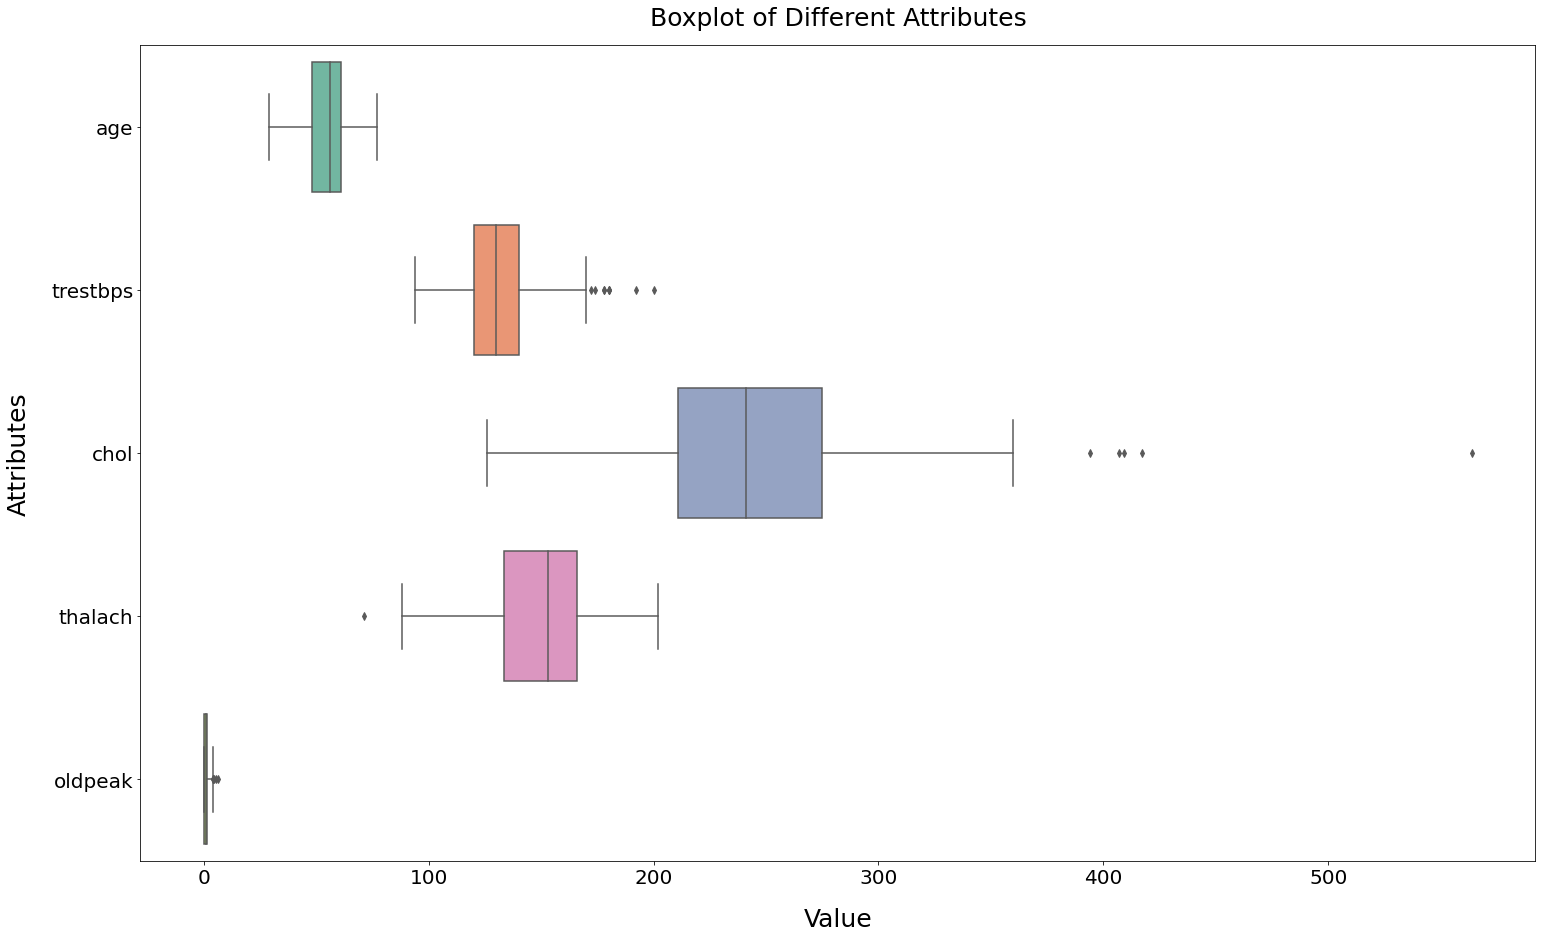

In [8]:
# Creating the Boxplot
plt.figure(figsize = (25,15))
ax = sns.boxplot(data = data_hdda[["age", "trestbps", "chol", "thalach", "oldpeak"]], orient = "h", palette = "Set2")
# Add labels
ax.set_xlabel("Value", fontsize = 25, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 25, labelpad = 20)
ax.set_title("Boxplot of Different Attributes", fontsize = 25, pad = 20)
# Edit ticks
ax.tick_params(which = "both", labelsize = 20)

__OBSERVATION:__ 

Outlier is present in chol column for serum cholestrol value.

##### 3.3.6 Converting Numerical Columns into Categorical Columns

__a) num Column__

In [9]:
# Converting num column data into Categorical Data
def heart_disease(row):
    if row == 0:
        return 'Absent'
    elif row == 1:
        return 'Present'

In [10]:
# Adding Heart_Disease Column to Dataset
data_hdda['Heart_Disease'] = data_hdda['num'].apply(heart_disease)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent


In [11]:
# Category wise Total Count of Heart_Disease
hd = data_hdda.groupby('Heart_Disease')['num'].count()
hd

Heart_Disease
Absent     164
Present    139
Name: num, dtype: int64

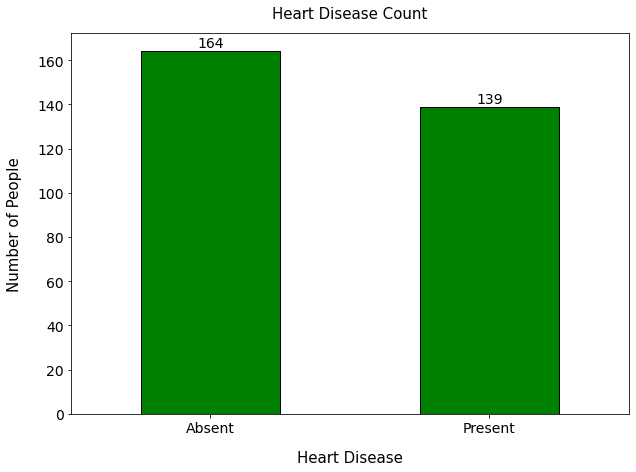

In [12]:
# Bar Chart for Heart Disease Count
Heart_Disease_hd = data_hdda['Heart_Disease'].value_counts()
plt.figure(figsize=(10, 7))
ax = Heart_Disease_hd.plot(kind='bar', rot=0, color="g", edgecolor = 'Black', fontsize = 14)
ax.set_title("Heart Disease Count", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Heart Disease', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Absent', 'Present'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__ Population not Diagnosed with Heart Dieases (Absent) __>__ Population Diagnosed with Heart Disease (Present).

__b) sex Column__

In [13]:
# Converting sex column data into Categorical Data
def gender(row):
    if row == 0:
        return 'Female'
    elif row == 1:
        return 'Male'

In [14]:
# Adding Gender Column to Dataset
data_hdda['Gender'] = data_hdda['sex'].apply(gender)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female


In [15]:
# Total Count of Gender
g = data_hdda.groupby('Gender')['sex'].count()
g

Gender
Female     97
Male      206
Name: sex, dtype: int64

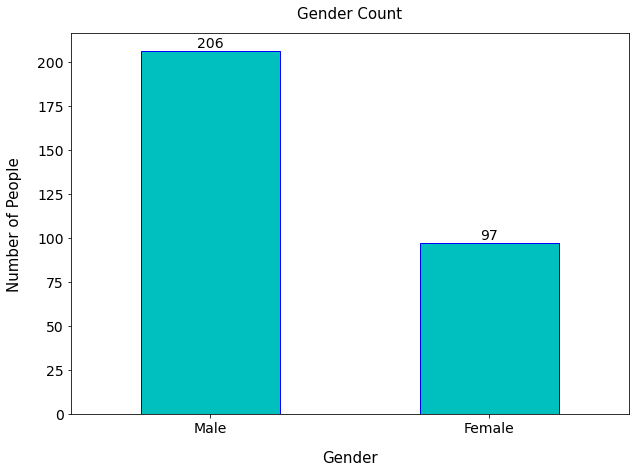

In [16]:
# Bar Chart for Gender Count
Gender_g = data_hdda['Gender'].value_counts()
plt.figure(figsize=(10, 7))
ax = Gender_g.plot(kind='bar', rot=0, color="c", edgecolor = 'Blue', fontsize = 14)
ax.set_title("Gender Count", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Male', 'Female'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__

Male Population __>__ Female Population

__c) age Column__

In [17]:
# Converting sex column data into Categorical Data
def age_group(row):
    if row >= 29 and row < 40:
        return 'Young Age'
    elif row >= 40 and row < 55:
        return 'Middle Age'
    elif row > 55:
        return 'Old Age'

In [18]:
# Adding Age_Group Column to Dataset
data_hdda['Age_Group'] = data_hdda['age'].apply(age_group)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender,Age_Group
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Old Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Old Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Old Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age


In [19]:
# Total Count in each Age_Group
ag = data_hdda.groupby('Age_Group')['age'].count()
ag

Age_Group
Middle Age    128
Old Age       152
Young Age      15
Name: age, dtype: int64

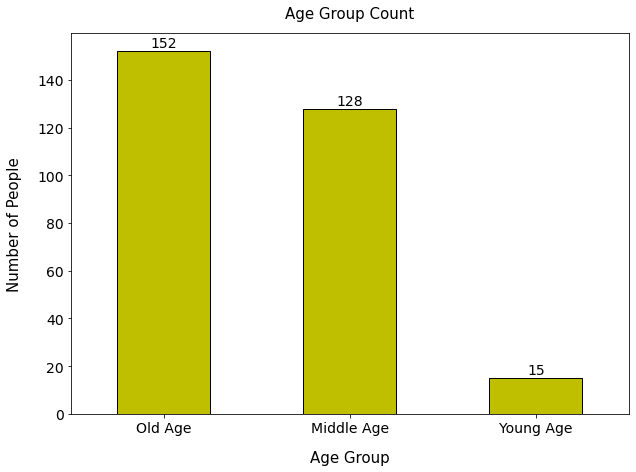

In [20]:
# Bar Chart for Age Group Count
Age_Group_ag = data_hdda['Age_Group'].value_counts()
plt.figure(figsize=(10, 7))
ax = Age_Group_ag.plot(kind='bar', rot=0, color="y", edgecolor = 'Black', fontsize = 14)
ax.set_title("Age Group Count", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Old Age', 'Middle Age', 'Young Age'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__
    
Old Age Group Population __>__ Middle Age Group Population __>__ Young Age Population.

__d) Gender Count Based on Age Group__

In [21]:
# Age Group wise Total Count of Gender
ag_g= data_hdda.groupby('Age_Group')['Gender'].value_counts()
ag_g

Age_Group   Gender
Middle Age  Male      93
            Female    35
Old Age     Male      99
            Female    53
Young Age   Male      10
            Female     5
Name: Gender, dtype: int64

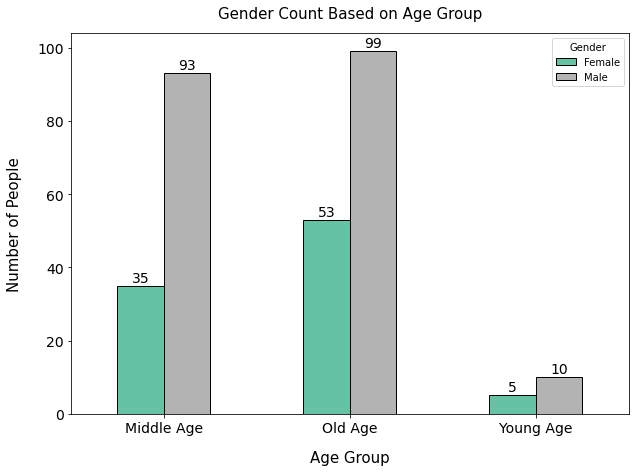

In [22]:
# Bar Chart for Gender Count based on Age Group
Age_Group_Gender = data_hdda.groupby('Age_Group')['Gender'].value_counts().unstack()
#plt.figure(figsize=(15, 10))
plt.rcParams["figure.figsize"] = (10, 7)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'Set2', rot = 0, edgecolor = 'Black', fontsize = 14)
ax.set_title("Gender Count Based on Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Middle Age', 'Old Age', 'Young Age'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)  
plt.show()

__OBSERVATION:__

Number of Male Population in Middle and Old Age Group __>__ Number of Female Population in Middle and Old Age Group.

__e) Chest Pain Type__

In [23]:
# Converting cp column data into Categorical Data
def cpt(row):
    if row == 1:
        return 'Typical Angina'
    elif row == 2:
        return 'Atypical Angina'
    elif row == 3:
        return 'Non-Anginal Pain'
    elif row == 4:
        return 'Asymptomatic'

In [24]:
# Adding Chest_Pain_Type Column to Dataset
data_hdda['Chest_Pain_Type'] = data_hdda['cp'].apply(cpt)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender,Age_Group,Chest_Pain_Type
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Old Age,Typical Angina
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Old Age,Asymptomatic
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Old Age,Asymptomatic
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age,Non-Anginal Pain
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age,Atypical Angina


In [25]:
# Category wise Total Count of Chest Pain Type
cpt_cp = data_hdda.groupby('Chest_Pain_Type')['cp'].count()
cpt_cp

Chest_Pain_Type
Asymptomatic        144
Atypical Angina      50
Non-Anginal Pain     86
Typical Angina       23
Name: cp, dtype: int64

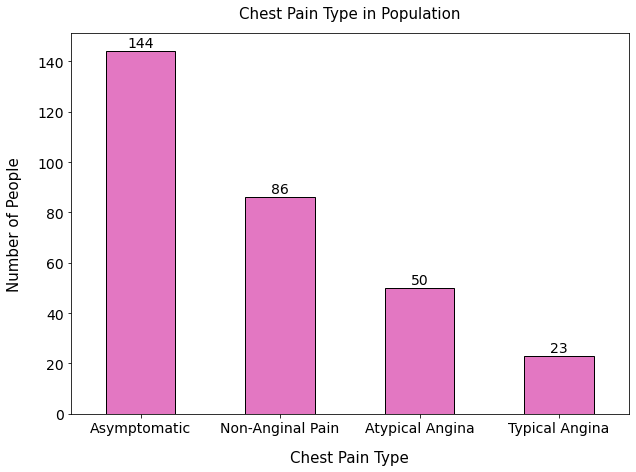

In [26]:
# Bar Chart for Chest Pain Type
Chest_Pain_Type_cpt = data_hdda['Chest_Pain_Type'].value_counts()
plt.figure(figsize=(10, 7))
ax = Chest_Pain_Type_cpt.plot(kind='bar', rot=0, color="tab:pink", edgecolor = 'Black', fontsize = 14)
ax.set_title("Chest Pain Type in Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Chest Pain Type', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Asymptomatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__
    
__Chest Pain Type In Population:__

Asymptomatic (__144__) __>__ Non-Anginal Pain (__86__) __>__ Atypical Angina (__50__) __>__ Typical Angina (__23__)

__f) Fasting Blood Sugar__

In [27]:
# Converting fbs column data into Categorical Data
def FBS(row):
    if row == 0:
        return 'Healthy'
    elif row == 1:
        return 'Unhealthy'

In [28]:
# Adding Fasting_Blood_Sugar Column to Dataset
data_hdda['Fasting_Blood_Sugar'] = data_hdda['fbs'].apply(FBS)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender,Age_Group,Chest_Pain_Type,Fasting_Blood_Sugar
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Old Age,Typical Angina,Unhealthy
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Old Age,Asymptomatic,Healthy
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Old Age,Asymptomatic,Healthy
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age,Non-Anginal Pain,Healthy
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age,Atypical Angina,Healthy


In [29]:
# Category wise Total Count of Fasting Blood Sugar
FBS_fbs = data_hdda.groupby('Fasting_Blood_Sugar')['fbs'].count()
FBS_fbs

Fasting_Blood_Sugar
Healthy      258
Unhealthy     45
Name: fbs, dtype: int64

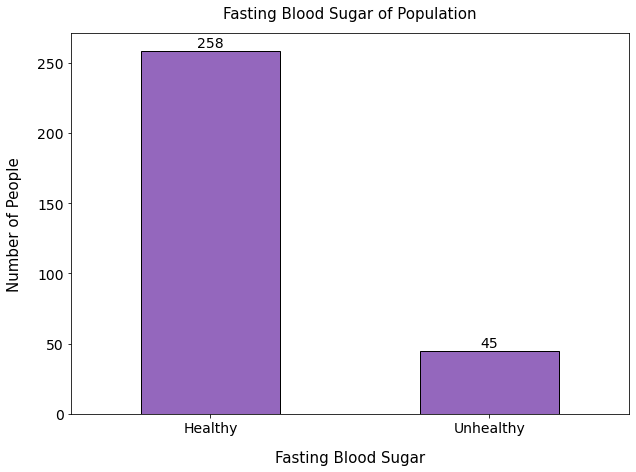

In [30]:
# Bar Chart for Fasting Blood Sugar
Fasting_Blood_Sugar_FBS = data_hdda['Fasting_Blood_Sugar'].value_counts()
plt.figure(figsize=(10, 7))
ax = Fasting_Blood_Sugar_FBS.plot(kind='bar', rot=0, color="tab:purple", edgecolor = 'Black', fontsize = 14)
ax.set_title("Fasting Blood Sugar of Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Fasting Blood Sugar', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Healthy', 'Unhealthy'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__
    
__Fasting Blood Sugar of Population:__

Healthy Population (__258__) __>__ Unhealthy Population (__45__)

__f) Resting Electrocardiographic Results__

In [31]:
# Converting fbs column data into Categorical Data
def RER(row):
    if row == 0:
        return 'Normal'
    elif row == 1:
        return 'Abnormality'
    elif row == 2:
        return 'Severe'

In [32]:
# Adding Fasting_Blood_Sugar Column to Dataset
data_hdda['Resting_Electrocardiographic_Results'] = data_hdda['restecg'].apply(RER)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender,Age_Group,Chest_Pain_Type,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Old Age,Typical Angina,Unhealthy,Severe
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age,Non-Anginal Pain,Healthy,Normal
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age,Atypical Angina,Healthy,Severe


In [33]:
# Category wise Total Count of Fasting Blood Sugar
RER_restecg = data_hdda.groupby('Resting_Electrocardiographic_Results')['restecg'].count()
RER_restecg

Resting_Electrocardiographic_Results
Abnormality      4
Normal         151
Severe         148
Name: restecg, dtype: int64

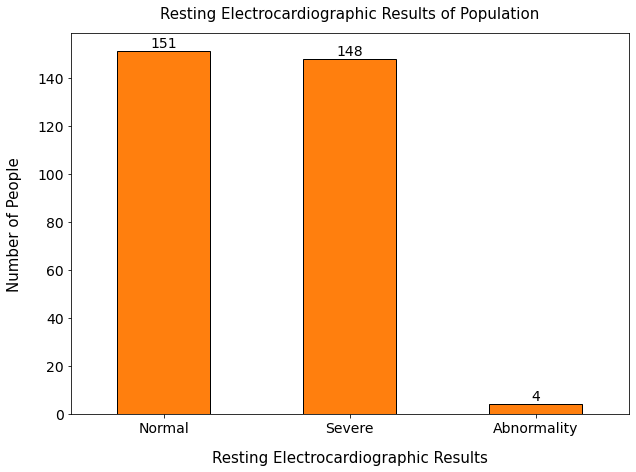

In [34]:
# Bar Chart for Fasting Blood Sugar
RE_Results = data_hdda['Resting_Electrocardiographic_Results'].value_counts()
plt.figure(figsize=(10, 7))
ax = RE_Results.plot(kind='bar', rot=0, color="tab:orange", edgecolor = 'Black', fontsize = 14)
ax.set_title("Resting Electrocardiographic Results of Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Resting Electrocardiographic Results', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Normal', 'Severe', 'Abnormality'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION__:
    
__Resting Electrocardiographic Results (RER) of Population:__
    
Population with Normal RER (__151__) __>__ Population with Severe RER (__148__) __>__ Population with Abnormality RER (__4__)

__g) Exercise Included Angina__

In [35]:
# Converting exang column data into Categorical Data
def angina(row):
    if row == 0:
        return 'No'
    elif row == 1:
        return 'Yes'

In [36]:
# Adding Exercise_Induced_Angina Column to Dataset
data_hdda['Exercise_Induced_Angina'] = data_hdda['exang'].apply(angina)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender,Age_Group,Chest_Pain_Type,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Exercise_Induced_Angina
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Old Age,Typical Angina,Unhealthy,Severe,No
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe,Yes
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe,Yes
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age,Non-Anginal Pain,Healthy,Normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age,Atypical Angina,Healthy,Severe,No


In [37]:
# Category wise Total Count of 
Angina_Ex = data_hdda.groupby('Exercise_Induced_Angina')['exang'].count()
Angina_Ex

Exercise_Induced_Angina
No     204
Yes     99
Name: exang, dtype: int64

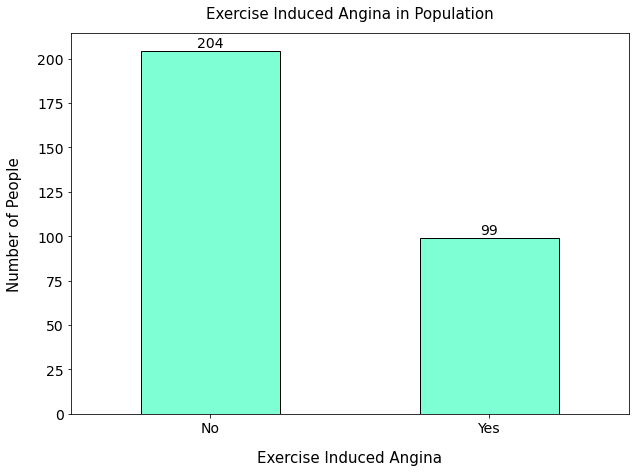

In [38]:
# Bar Chart for Fasting Blood Sugar
Angina_exang = data_hdda['Exercise_Induced_Angina'].value_counts()
plt.figure(figsize=(10, 7))
ax = Angina_exang.plot(kind='bar', rot=0, color="aquamarine", edgecolor = 'Black', fontsize = 14)
ax.set_title("Exercise Induced Angina in Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Exercise Induced Angina', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('No', 'Yes'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__
    
Excercise Induced Angina is observed in approx. half of the Population (__99__) 

__h) ST Exercise Peak__

In [39]:
# Converting slope column data into Categorical Data
def STslope(row):
    if row == 1:
        return 'Upsloping'
    elif row == 2:
        return 'Flat'
    elif row == 3:
        return 'Downsloping'

In [40]:
# Adding ST_Exercise_Peak Column to Dataset
data_hdda['ST_Exercise_Peak'] = data_hdda['slope'].apply(STslope)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender,Age_Group,Chest_Pain_Type,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Exercise_Induced_Angina,ST_Exercise_Peak
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Old Age,Typical Angina,Unhealthy,Severe,No,Downsloping
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe,Yes,Flat
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe,Yes,Flat
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age,Non-Anginal Pain,Healthy,Normal,No,Downsloping
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age,Atypical Angina,Healthy,Severe,No,Upsloping


In [41]:
# Category wise Total Count of slope of ST Exercise Peak
ST = data_hdda.groupby('ST_Exercise_Peak')['slope'].count()
ST

ST_Exercise_Peak
Downsloping     21
Flat           140
Upsloping      142
Name: slope, dtype: int64

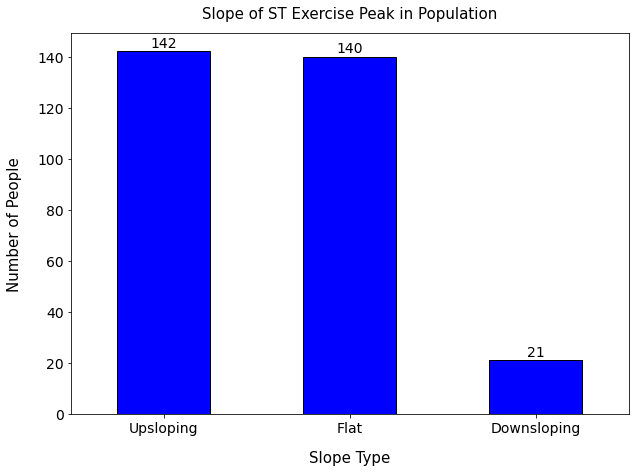

In [42]:
# Bar Chart for ST Exercise Peak
ST_Exercise_Peak_ST = data_hdda['ST_Exercise_Peak'].value_counts()
plt.figure(figsize=(10, 7))
ax = ST_Exercise_Peak_ST.plot(kind='bar', rot=0, color="b", edgecolor = 'Black', fontsize = 14)
ax.set_title("Slope of ST Exercise Peak in Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Slope Type', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Upsloping', 'Flat', 'Downsloping'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__
    
Downsloping (__142__) is seen most in ST Exercise Peak in Population followed by Flat (__140__) ST Exercise Peak and then Upsloping (__21__) ST Exercise Peak

__i) Thalium Stress Test__

In [43]:
# Converting thal column data into Categorical Data
def thalassemia(row):
    if row == 3:
        return 'Normal'
    elif row == 6:
        return 'Fixed Defect'
    elif row == 7:
        return 'Reversable Defect'
    else:
        'None'

In [44]:
# Adding Thallium_Stress_Test Column to Dataset
data_hdda['Thallium_Stress_Test'] = data_hdda['thal'].apply(thalassemia)
data_hdda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,Gender,Age_Group,Chest_Pain_Type,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Exercise_Induced_Angina,ST_Exercise_Peak,Thallium_Stress_Test
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Old Age,Typical Angina,Unhealthy,Severe,No,Downsloping,Fixed Defect
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe,Yes,Flat,Normal
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Old Age,Asymptomatic,Healthy,Severe,Yes,Flat,Reversable Defect
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age,Non-Anginal Pain,Healthy,Normal,No,Downsloping,Normal
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age,Atypical Angina,Healthy,Severe,No,Upsloping,Normal


In [45]:
# Category wise Total Count of Thallium Stress Test
TST = data_hdda.groupby('Thallium_Stress_Test')['thal'].count()
TST

Thallium_Stress_Test
Fixed Defect          18
Normal               166
Reversable Defect    117
Name: thal, dtype: int64

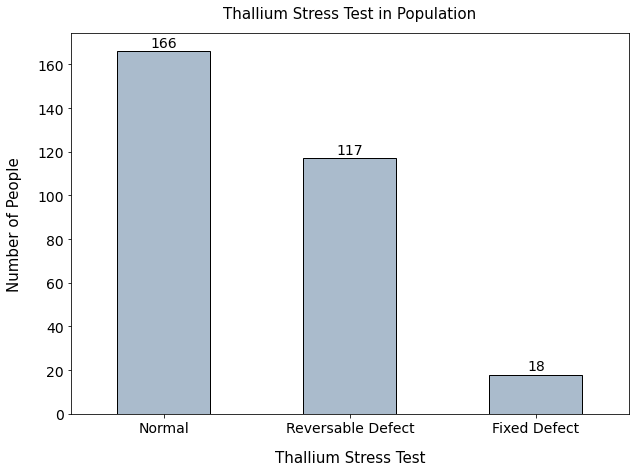

In [46]:
# Bar Chart for Thallium Stress Test
Thallium_Stress_Test_TST = data_hdda['Thallium_Stress_Test'].value_counts()
plt.figure(figsize=(10, 7))
ax = Thallium_Stress_Test_TST.plot(kind='bar', rot=0, color="#aabbcc", edgecolor = 'Black', fontsize = 14)
ax.set_title("Thallium Stress Test in Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Thallium Stress Test', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Normal', 'Reversable Defect', 'Fixed Defect'), fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

__OBSERVATION:__
    
__Defects in Thallium Stress Test in Population:__ 
    
Fixed Defect __>__ Normal __>__ Reversable Defect

### 4. Performing Exploratory Data Analysis on Data

### 4.1 Heart Disease

#### 4.1.1. Total Percentage of Heart Disease Population  

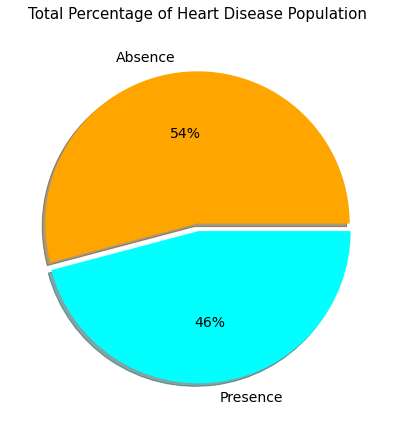

In [47]:
# Calculating Total Percentage of Heart Disease Population Using Pie Chart
plt.figure(figsize=(12,7))
explode = (0, 0.05)
plt.pie(hd, colors = ( "orange", "cyan"), explode = explode, shadow = True, labels = ['Absence','Presence'], autopct='%0.0f%%', textprops={'fontsize': 14})
plt.title('Total Percentage of Heart Disease Population', fontsize=15, pad = 15)
plt.show()

__OBSERVATION:__ 

From the graph, People having Heart Disease is around 46% of the population __<__ People not having Heart Disease which is 54% of the population. 

#### 4.1.2. Heart Disease Count Based on Gender and Age Group

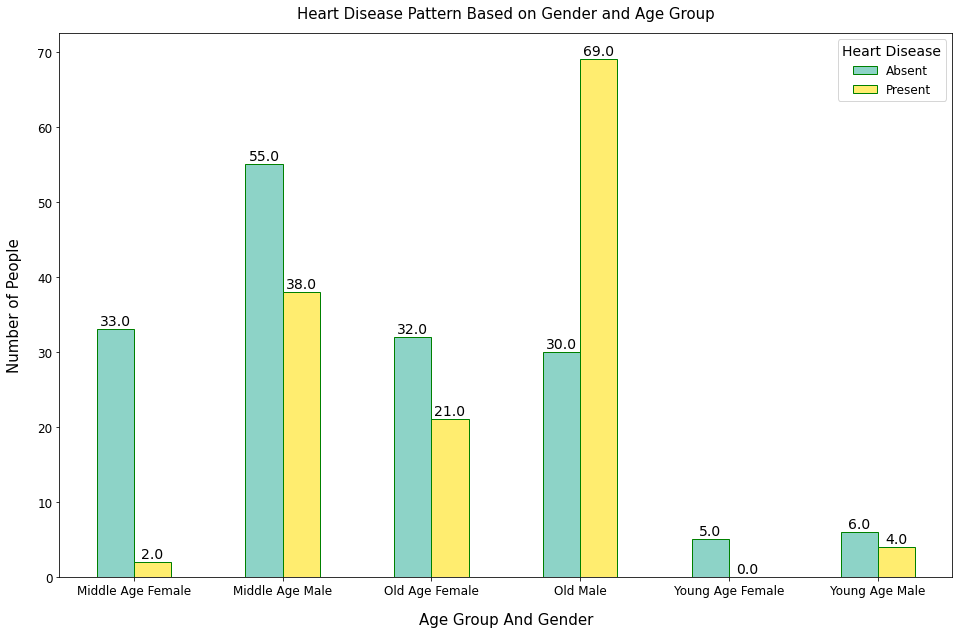

In [48]:
# Bar Graph of Heart Disease Count Based on Gender and Age Group
Age_Group_Gender = data_hdda.groupby(['Age_Group', 'Gender'])['Heart_Disease'].value_counts().unstack()
#plt.figure(figsize=(15, 10))
plt.rcParams["figure.figsize"] = (16, 10)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'Set3', rot = 0, edgecolor = 'Green', fontsize = 12)
ax.set_title("Heart Disease Pattern Based on Gender and Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group And Gender', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
# ax.set_xticklabels(('Old Age', 'Middle Age', 'Young Age'))
ax.set_xticklabels(('Middle Age Female', 'Middle Age Male', 'Old Age Female', 'Old Male', 'Young Age Female', 'Young Age Male'), fontsize = 12)

plt.legend(title = 'Heart Disease', title_fontsize = 14, labels = ['Absent', 'Present'], fontsize=12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)  
plt.show()

__OBSERVATION:__ 


__Age Group wise Population Suffering from Heart Disease:__

Old Age Population __>__ Middle Age Population __>__ Young Age Population.



__Gender wise Population Suffering from Heart Disease:__

Male Population __>__ Female Population.



__Male Population Having Heart Disease:__

Male Population in Old Age Group (approx. 69 Males) __>__ Male Population in Middle Age (approx. 38 Males) __>__ Male Population Young Age Group.



__Female Population Having Heart Disease:__

Female Population in Old Age Group (approx. 21 Females) __>__ Female Population in Middle Age Group __>__ Female Population Young Age Group.

### 4.2 Chest Pain

#### 4.2.1 Chest Pain Experienced by Population Suffering with Heart Disease 

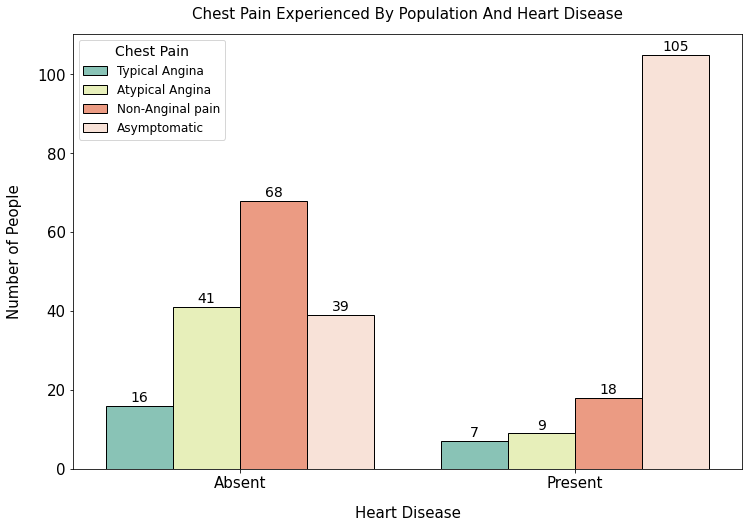

In [49]:
# Chest Pain Experienced by Population Suffering with Heart Disease 
plt.figure(figsize=(12,8))
ax = sns.countplot(x = data_hdda['Heart_Disease'], hue = 'cp', data = data_hdda, order=['Absent', 'Present'], palette = ['#7fcdbb', '#edf8b1', '#fc9272', '#fee0d2'], edgecolor = 'Black')
plt.title('Chest Pain Experienced By Population And Heart Disease', fontsize = 15, pad = 15)
plt.xlabel('Heart Disease', fontsize = 15, labelpad = 15)
plt.ylabel('Number of People', fontsize = 15, labelpad = 15)

plt.yticks(size=15)
plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Chest Pain', title_fontsize = 14, labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'], fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)

plt.show()

__OBSERVATION:__

Asymptomatic Chest Pain  __>__ Non-Anginal pain __>__ Atypical Angina __>__ Typical Angina 

Population Experiencing Asymptomatic Chest Pain are more prone to suffer from Heart Disease

#### 4.2.2 Chest Pain Experienced by Population based on Gender and Age Group 

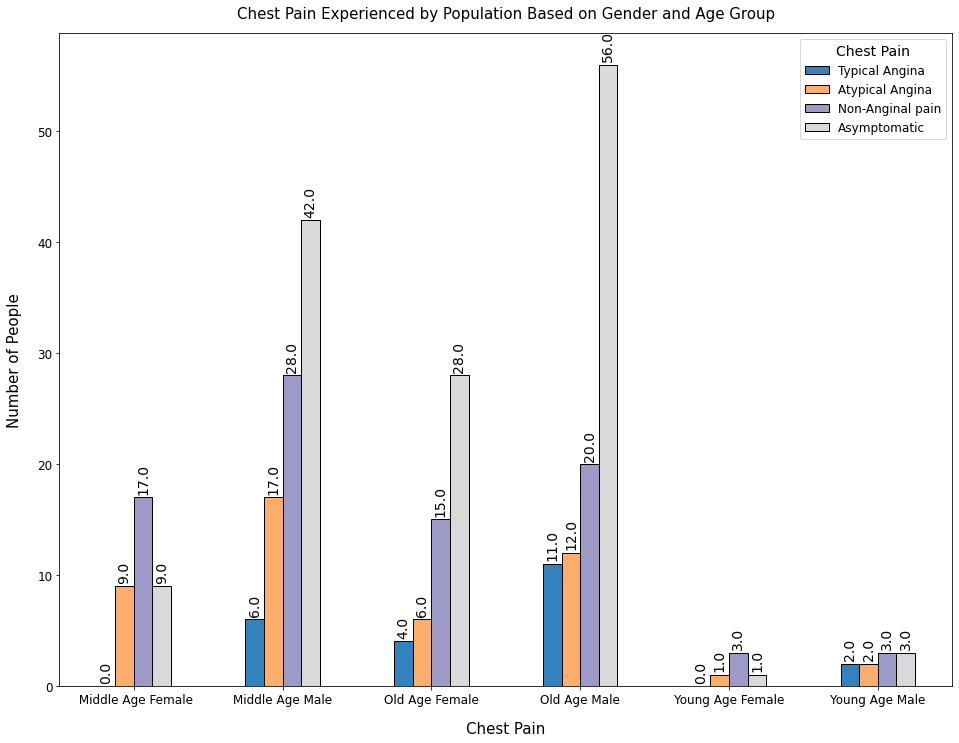

In [50]:
# Chest Pain Experienced by Population Based on Gender and Age Group
Age_Group_Gender = data_hdda.groupby(['Age_Group', 'Gender'])['cp'].value_counts().unstack()

plt.rcParams["figure.figsize"] = (16, 12)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'tab20c', rot = 0, edgecolor = 'Black', fontsize = 12)
ax.set_title("Chest Pain Experienced by Population Based on Gender and Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Chest Pain', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels((' Middle Age Female', 'Middle Age Male', 'Old Age Female', 'Old Age Male', 'Young Age Female', 'Young Age Male'), fontsize = 12)

# plt.yticks(size=15)
# plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Chest Pain', labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'], fontsize = 12, title_fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 90)

plt.show()

__OBSERVATION:__

__Chest Pain Experienced by Population from different Age Group:__

Old Age Population __>__ Middle Age Population __>__ Young Age Population

Old and Middle Age Group population suffer more from Asymptomatic Chest Pain


__Chest Pain Experienced by Population based on Gender:__

- __Asymptomatic Chest Pain:__  Male Population __>__ Female Population
- __Non-Anginal pain       :__  Male Population __>__ Female Population 
- __Atypical Angina        :__  Male Population __>__ Female Population
- __Typical Angina         :__  Male Population __>__ Female Population 


__Chest Pain Experienced by Male Population:__

- __Asymptomatic Chest Pain:__  Old Age Male Population __>__ Middle Age Male Population __>__ Young Age Male Population
- __Non-Anginal pain       :__  Middle Age Male Population __>__ Old Age Male Population __>__ Young Age Male Population
- __Atypical Angina        :__  Middle Age Male Population __>__ Old Age Male Population __>__ Young Age Male Population
- __Typical Angina         :__  Old Age Male Population __>__ Middle Age Male Population __>__ Young Age Male Population


__Chest Pain Experienced by Female Population:__

- __Asymptomatic Chest Pain:__  Old Age Female Population __>__ Middle Age Female Population __>__ Young Age Female Population
- __Non-Anginal pain       :__  Middle Age Female Population __>__ Old Age Female Population __>__ Young Age Female Population
- __Atypical Angina        :__  Middle Age Female Population __>__ Old Age Female Population __>__ Young Age Female Population
- __Typical Angina         :__  Old Age Female Population __>__ Middle  and Young Age Female Population

### 4.3 Blood Pressure

#### 4.3.1 Blood Pressure of Heart Disease Population

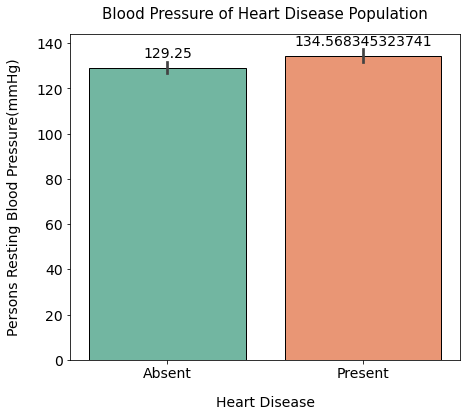

In [51]:
# Bar Chart for Blood Pressure of Heart Disease Population
plt.rcParams["figure.figsize"] = (7, 6)
ax = sns.barplot(x = 'Heart_Disease', y = 'trestbps', data = data_hdda, order=['Absent', 'Present'], palette = 'Set2', edgecolor = 'Black')
ax.set_title("Blood Pressure of Heart Disease Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Heart Disease', fontsize = 14, labelpad = 15)
ax.set_ylabel('Persons Resting Blood Pressure(mmHg)', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 7), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__

Population suffering from Heart Disease have higher Resting Blood Pressure (mmHg) than those population with no Heart Disease.

Resting Blood Pressure (mmHg) With Heart Disease which is approx. __134.57 mmHg__ __>__ Resting Blood Pressure (mmHg) With no Heart Disease which is approx. __129.25 mmHg__

#### 4.3.2 Blood Pressure Based on Gender 

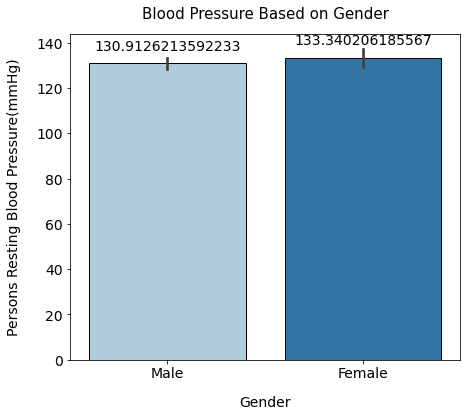

In [52]:
# Blood Pressure Based on Gender
plt.rcParams["figure.figsize"] = (7, 6)
ax = sns.barplot(x = 'Gender', y = 'trestbps', data = data_hdda, order=['Male', 'Female'], palette = 'Paired', edgecolor = 'Black')
ax.set_title("Blood Pressure Based on Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 14, labelpad = 15)
ax.set_ylabel('Persons Resting Blood Pressure(mmHg)', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__ 

Resting Blood Pressure (mmHg) is almost same for Male (130.9 mmHg) and Female (133.3 mm Hg) Population.

#### 4.3.3 Blood Pressure Based on Age Group and Age

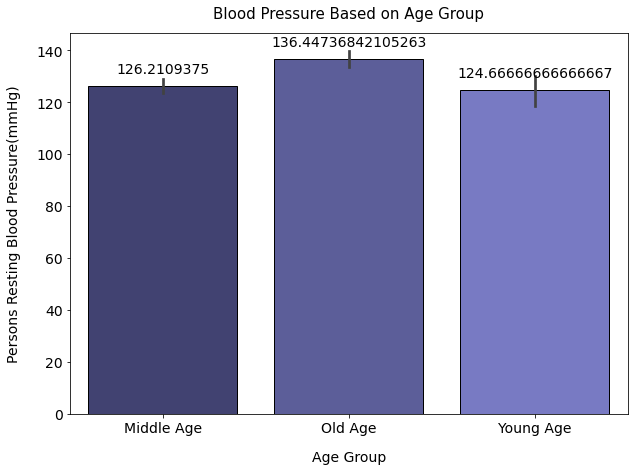

In [53]:
# Blood Pressure Based on Age Group
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.barplot(x = 'Age_Group', y = 'trestbps', data = data_hdda, order=['Middle Age', 'Old Age', 'Young Age'], palette = 'tab20b', edgecolor = 'Black')
ax.set_title("Blood Pressure Based on Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 14, labelpad = 15)
ax.set_ylabel('Persons Resting Blood Pressure(mmHg)', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

# Young Age: row >= 29 and row < 40
# Middle Age: row >= 40 and row < 55
# Old Age: row > 55
        
plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

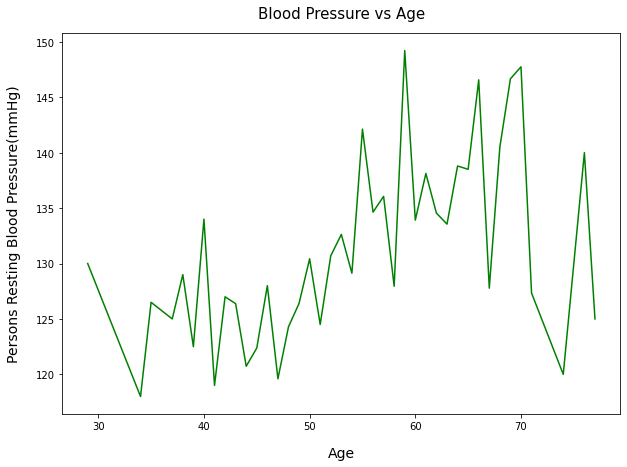

In [54]:
# Blood Pressure vs on Age 
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.lineplot(x='age', y='trestbps', data = data_hdda, color = 'g', ci = None)
ax.set_title("Blood Pressure vs Age", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age', fontsize = 14, labelpad = 15)
ax.set_ylabel('Persons Resting Blood Pressure(mmHg)', fontsize = 14, labelpad = 15)
plt.show()

__OBSERVATION:__

Resting Blood Pressure (mmHg) of Old Age Group (i.e.Age aroung 55 - 70 years) is higher than Middle and Younger Age group, After Age 70 years there is drop in blood pressure.

Old Age Group (__134. 44 mmHg__) __>__ Middle Age Group (__126.21 mmHg__) __>__ Young Age Group (__124.66 mmHg__).

### 4.4 Serum Cholestrol

#### 4.4.1 Serum Cholestrol Level of Heart Disease Population

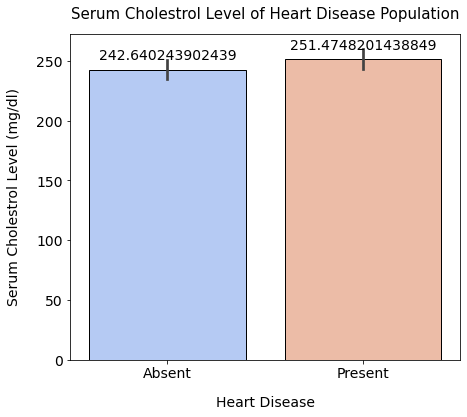

In [55]:
# Bar Chart for Serum Cholestrol Level of Heart Disease Population
plt.rcParams["figure.figsize"] = (7, 6)
ax = sns.barplot(x = 'Heart_Disease', y = 'chol', data = data_hdda, order=['Absent', 'Present'], palette = 'coolwarm', edgecolor = 'Black')
ax.set_title("Serum Cholestrol Level of Heart Disease Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Heart Disease', fontsize = 14, labelpad = 15)
ax.set_ylabel('Serum Cholestrol Level (mg/dl)', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 7), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
Serum Cholestrol Level (__251.474__) of Heart Disease Population and Serum Cholestrol Level (__242.640__) of Population with no Heart Disease.

Serum Cholestrol Level has no significance impact on Heart Disease Risk

#### 4.4.2 Serum Cholestrol Level vs Blood Pressure

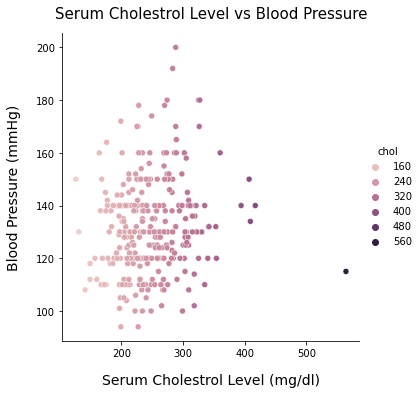

In [56]:
# Bar Chart for Cholestrol Level vs Resting Blood Pressure (mmHg)
plt.rcParams["figure.figsize"] = (7, 6)
ax = sns.relplot(x="chol", y="trestbps", data=data_hdda, kind="scatter", hue = 'chol')

plt.title('Serum Cholestrol Level vs Blood Pressure', fontsize = 15, pad = 15)
plt.xlabel('Serum Cholestrol Level (mg/dl)', fontsize = 14, labelpad = 15)
plt.ylabel('Blood Pressure (mmHg)', fontsize = 14, labelpad = 15)

plt.show()

__OBSERVATION:__
    
There is no relation between Blood Pressure and Serum Cholestrol Level

#### 4.4.3 Serum Cholestrol Level Based On Gender

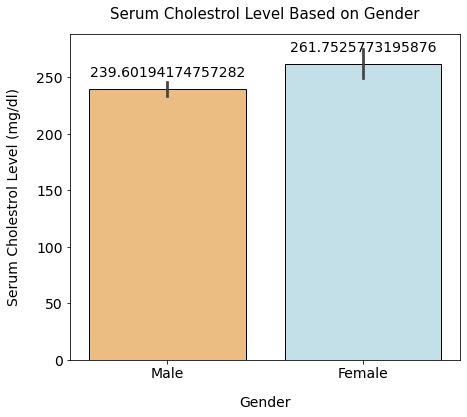

In [57]:
# Serum Cholestrol Level Based On Gender
plt.rcParams["figure.figsize"] = (7, 6)
ax = sns.barplot(x = 'Gender', y = 'chol', data = data_hdda, order=['Male', 'Female'], palette = 'RdYlBu', edgecolor = 'Black')
ax.set_title("Serum Cholestrol Level Based on Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 14, labelpad = 15)
ax.set_ylabel('Serum Cholestrol Level (mg/dl)', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
Serum Cholestrol Level (__261.75__) in Femal Population __>__ Serum Cholestrol Level (__239.60__) in Male Population

#### 4.4.4 Serum Cholestrol Level Based on Age Group and Age

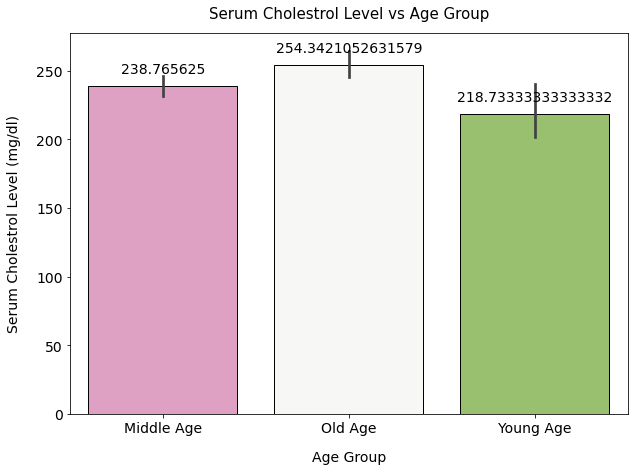

In [58]:
# Serum Cholestrol Level vs Age Group
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.barplot(x = 'Age_Group', y = 'chol', data = data_hdda, order=['Middle Age', 'Old Age', 'Young Age'], palette = 'PiYG', edgecolor = 'Black')
ax.set_title("Serum Cholestrol Level vs Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 14, labelpad = 15)
ax.set_ylabel('Serum Cholestrol Level (mg/dl)', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

# Young Age: row >= 29 and row < 40
# Middle Age: row >= 40 and row < 55
# Old Age: row > 55
        
plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

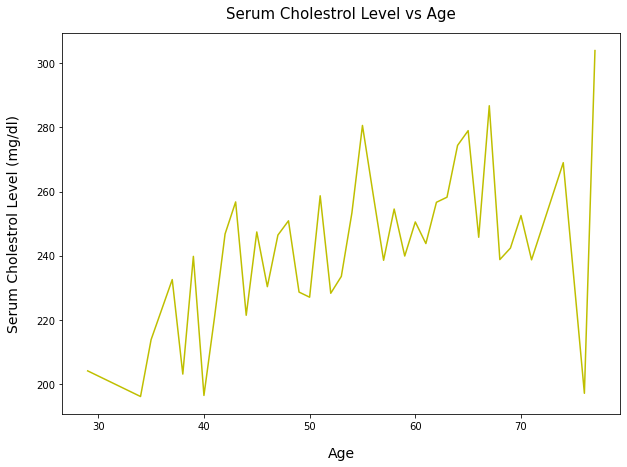

In [59]:
# Serum Cholestrol Level vs Age 
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.lineplot(x='age', y='chol', data = data_hdda, color = 'y', ci = None)
ax.set_title("Serum Cholestrol Level vs Age", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age', fontsize = 14, labelpad = 15)
ax.set_ylabel('Serum Cholestrol Level (mg/dl)', fontsize = 14, labelpad = 15)
plt.show()

__OBSERVATION:__
    
__Serum Cholestrol Level Vs Age Group:__
    
Old Age population has higher Serum Cholestrol Level.
    
Old Age (__254.34__) __>__ Middle Age (__238.76__) __>__ Young Age (__218.73__)


__Serum Cholestrol Level Vs Age:__

Serum Cholestrol Level increases gradually between 42-65 Years.

###  4.5 Fasting Blood Sugar

#### 4.5.1 Fasting Blood Sugar of Heart Disease Population

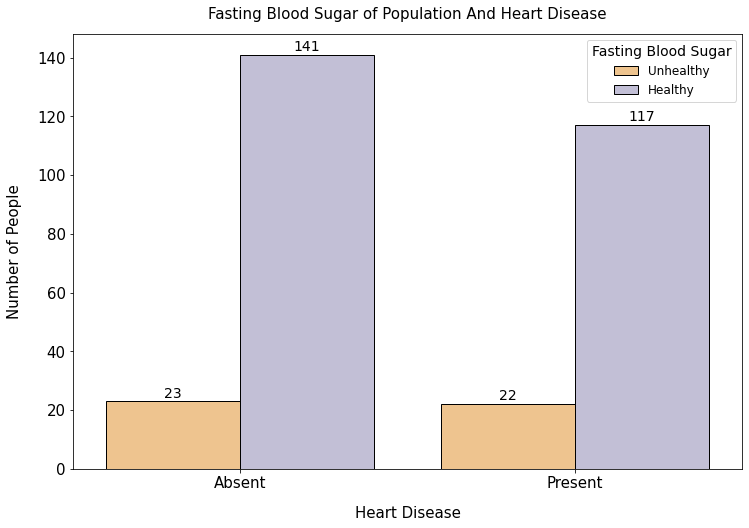

In [60]:
# Fasting Blood Sugar of Population And Heart Disease
plt.figure(figsize=(12,8))
ax = sns.countplot(x = data_hdda['Heart_Disease'], hue = 'Fasting_Blood_Sugar', data = data_hdda, order=['Absent', 'Present'], palette = 'PuOr', edgecolor = 'Black')
plt.title('Fasting Blood Sugar of Population And Heart Disease', fontsize = 15, pad = 15)
plt.xlabel('Heart Disease', fontsize = 15, labelpad = 15)
plt.ylabel('Number of People', fontsize = 15, labelpad = 15)

plt.yticks(size=15)
plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Fasting Blood Sugar', title_fontsize = 14, labels=['Unhealthy', 'Healthy'], fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)

plt.show()

__OBSERVATION:__
    
Heart Disease Population (__22__) having Fasting Blood Sugar __<__ Heart Disease Population (__117__) with  no Fasting Blood Sugar.

Fasting Blood Sugar has no significance impact on Heart Disease Risk

#### 4.5.2 Fasting Blood Sugar of Population Based on Gender 

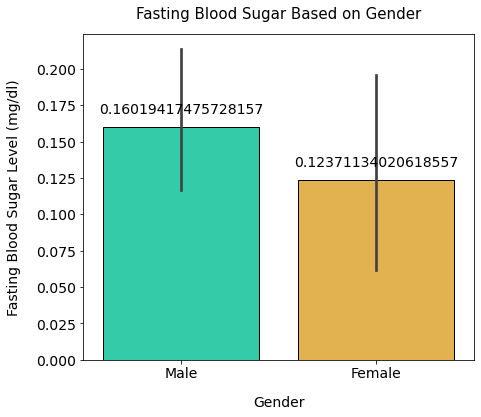

In [61]:
# Fasting Blood Sugar Based On Gender
plt.rcParams["figure.figsize"] = (7, 6)
ax = sns.barplot(x = 'Gender', y = 'fbs', data = data_hdda, order=['Male', 'Female'], palette = 'turbo', edgecolor = 'Black')
ax.set_title("Fasting Blood Sugar Based on Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 14, labelpad = 15)
ax.set_ylabel('Fasting Blood Sugar Level (mg/dl)', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

#### 4.5.3 Fasting Blood Sugar of Population Based on Gender and Age Group

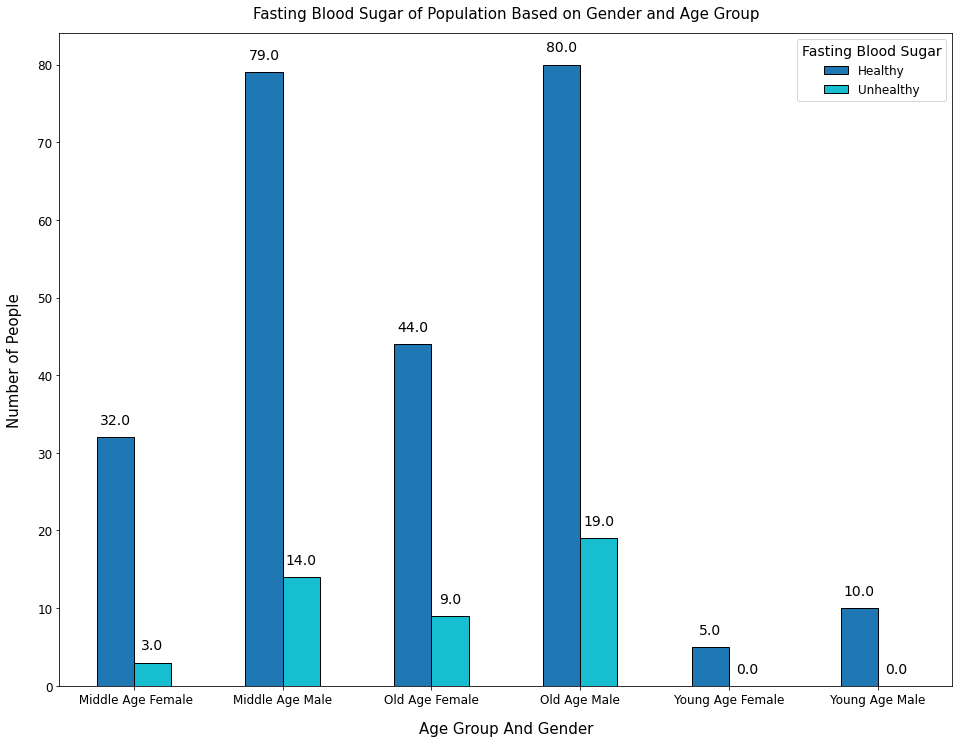

In [62]:
# Fasting Blood Sugar of Population Based on Gender and Age Group
Age_Group_Gender = data_hdda.groupby(['Age_Group', 'Gender'])['Fasting_Blood_Sugar'].value_counts().unstack()

plt.rcParams["figure.figsize"] = (16, 12)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'tab10', rot = 0, edgecolor = 'Black', fontsize = 12)
ax.set_title("Fasting Blood Sugar of Population Based on Gender and Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group And Gender', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels((' Middle Age Female', 'Middle Age Male', 'Old Age Female', 'Old Age Male', 'Young Age Female', 'Young Age Male'), fontsize = 12)

# plt.yticks(size=15)
# plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Fasting Blood Sugar', fontsize = 12, labels= ['Healthy', 'Unhealthy'], title_fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__

__Population having Fasting Blood Sugar Based on Gender:__

Male Population having Fasting Blood Sugar  (__0.160 mg/dl__) __>__ Female Population having Fasting Blood Sugar (__0.123 mg/dl__)

__Population Based on Age Group having Fasting Blood Sugar:__

Old Age Population __>__ Middle Age Population __>__ Young Age Population

### 4.6 Resting Electrocardiographic Results

#### 4.6.1 Resting Electrocardiographic Results of Population And Heart Disease

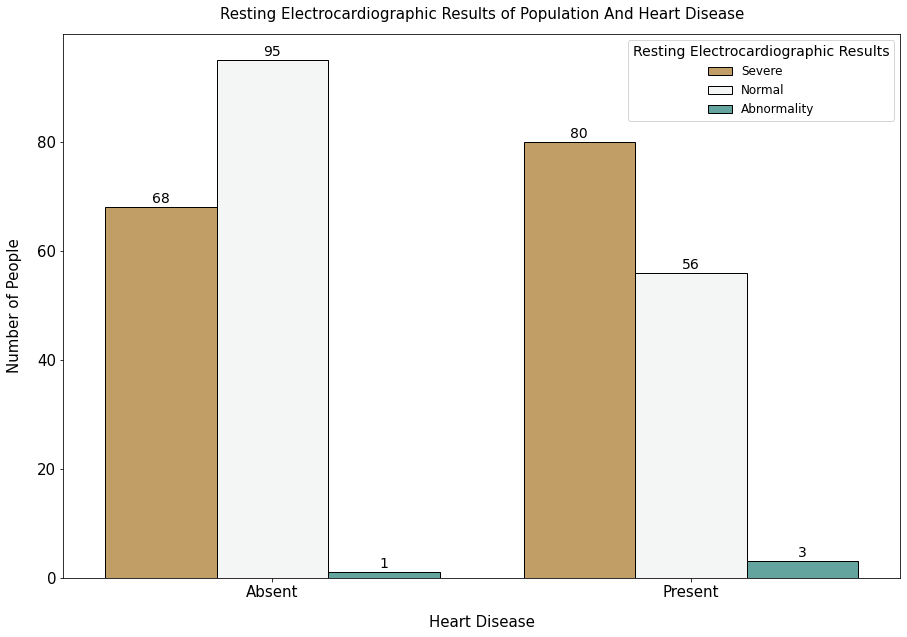

In [63]:
# Resting Electrocardiographic Results of Population And Heart Disease
plt.figure(figsize=(15,10))
ax = sns.countplot(x = data_hdda['Heart_Disease'], hue = 'Resting_Electrocardiographic_Results', data = data_hdda, order=['Absent', 'Present'], palette = 'BrBG', edgecolor = 'Black')
plt.title('Resting Electrocardiographic Results of Population And Heart Disease', fontsize = 15, pad = 15)
plt.xlabel('Heart Disease', fontsize = 15, labelpad = 15)
plt.ylabel('Number of People', fontsize = 15, labelpad = 15)

plt.yticks(size=15)
plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Resting Electrocardiographic Results', title_fontsize = 14, labels=['Severe', 'Normal', 'Abnormality'], fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)

plt.show()

__OBSERVATION:__ 
    
__Resting Electrocardiac Results of most of the Heart Disease Diagnostic Population is:__
    
Severe __>__ Normal __>__ Abnormality

#### 4.6.2 Resting Electrocardiographic Results of Population Based on Gender

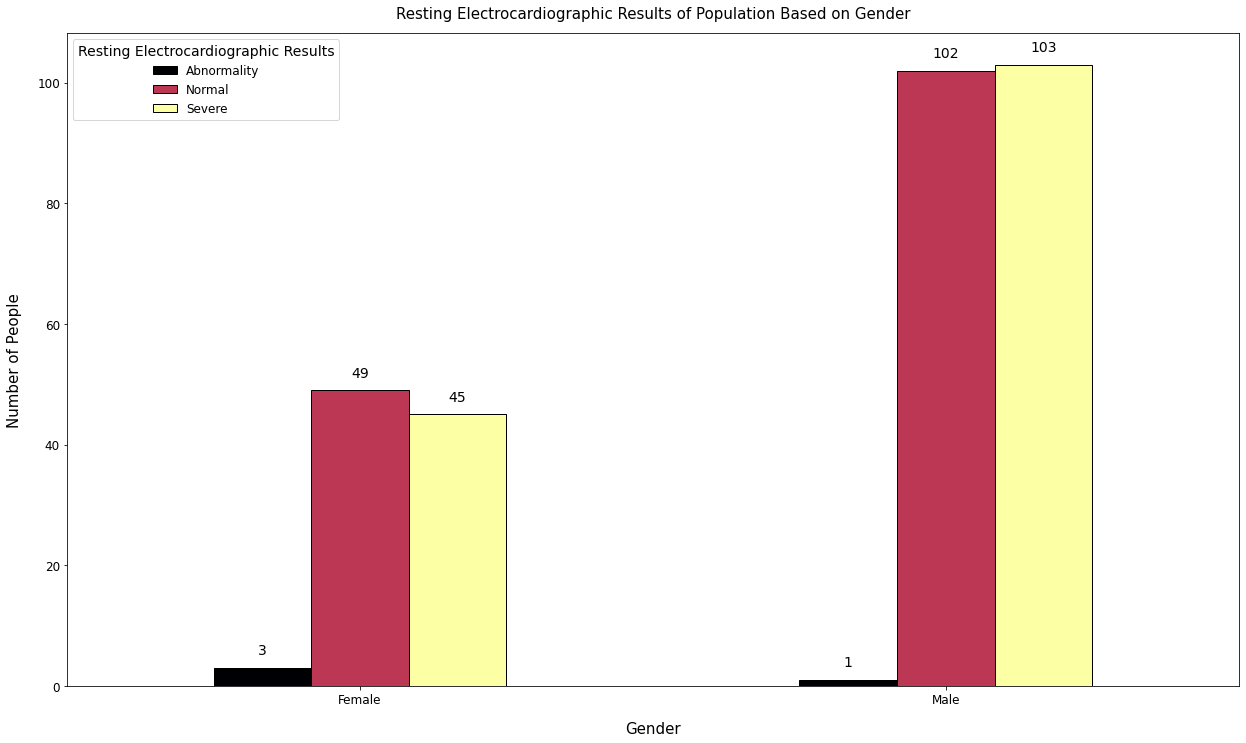

In [64]:
# Resting Electrocardiographic Results of Population on Gender and Age Group
Age_Group_Gender = data_hdda.groupby(['Gender'])['Resting_Electrocardiographic_Results'].value_counts().unstack()

plt.rcParams["figure.figsize"] = (21, 12)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'inferno', rot = 0, edgecolor = 'Black', fontsize = 12)
ax.set_title("Resting Electrocardiographic Results of Population Based on Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Female', 'Male'), fontsize = 12)

# plt.yticks(size=15)
# plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Resting Electrocardiographic Results', fontsize = 12, labels= ['Abnormality', 'Normal', 'Severe'], title_fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__ 
    
__Severe in Resting Electrocardiac Results Based on Gender:__

Males __>__ Female
 
__Abnormality Resting Electrocardiac Results Based on Gender:__ 
    
Female __>__ Male

#### 4.6.3 Resting Electrocardiographic Results of Population Based on Age Group

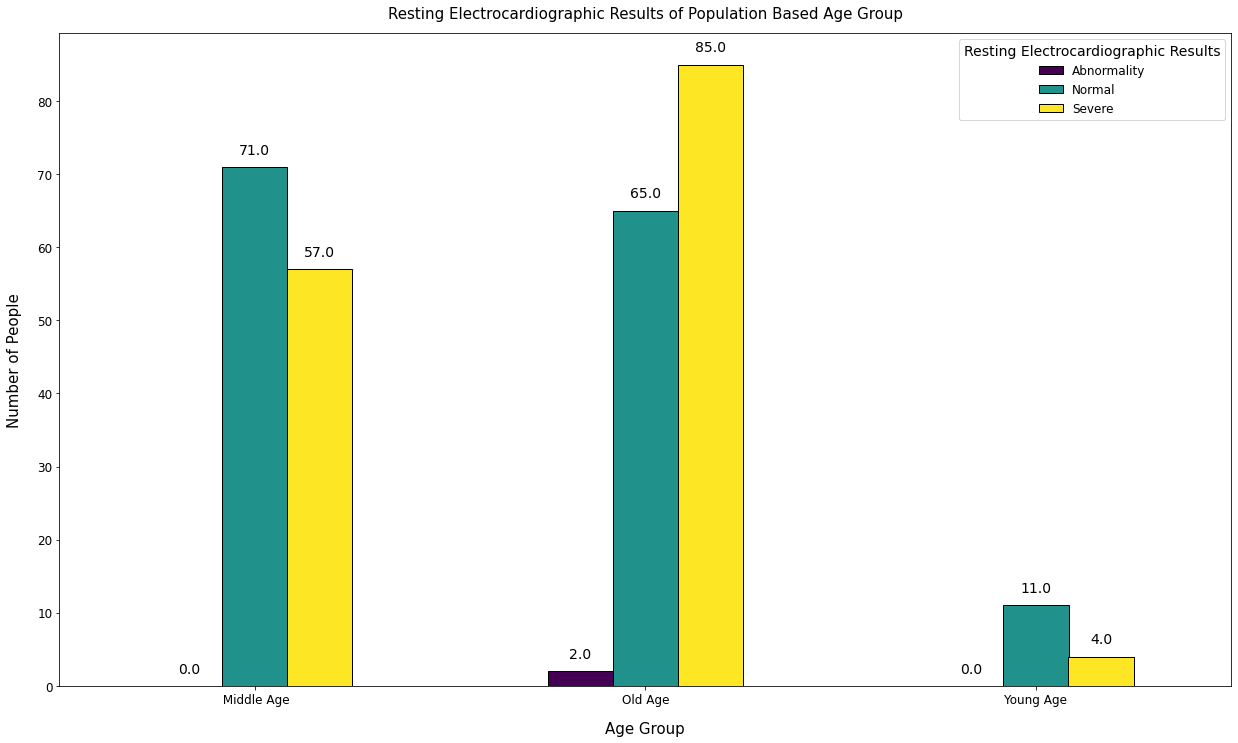

In [65]:
# Resting Electrocardiographic Results of Population on Gender and Age Group
Age_Group_Gender = data_hdda.groupby(['Age_Group'])['Resting_Electrocardiographic_Results'].value_counts().unstack()

plt.rcParams["figure.figsize"] = (21, 12)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'viridis', rot = 0, edgecolor = 'Black', fontsize = 12)
ax.set_title("Resting Electrocardiographic Results of Population Based Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels((' Middle Age', 'Old Age', 'Young Age'), fontsize = 12)

# plt.yticks(size=15)
# plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Resting Electrocardiographic Results', fontsize = 12, labels= ['Abnormality', 'Normal', 'Severe'], title_fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
__Severe in Resting Electrocardiac Results Based on Age Group:__

 Old Age __>__ Middle Age __>__ Young Age
 
__Abnormality Resting Electrocardiac Results Based on Age Group:__ 
    
Old Age Group

### 4.7 Maximum Heart Rate Achieved

#### 4.7.1 Maximum Heart Rate Achieved vs Heart Disease

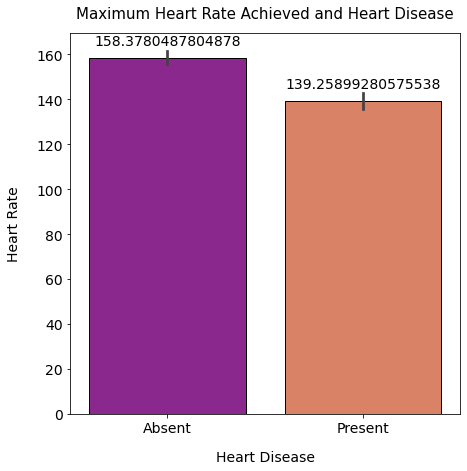

In [66]:
#  Maximum Heart Rate Achieved vs Heart Disease
plt.rcParams["figure.figsize"] = (7, 7)
ax = sns.barplot(x = 'Heart_Disease', y = 'thalach', data = data_hdda, order=['Absent', 'Present'], palette = 'plasma', edgecolor = 'Black')
ax.set_title("Maximum Heart Rate Achieved and Heart Disease", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Heart Disease', fontsize = 14, labelpad = 15)
ax.set_ylabel('Heart Rate', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__

Maximum Heart Rate Achieved by Population having Heart Disease is approx __139.25__  __<__ Maximum Heart Rate Achieved by Population with No Heart Disease is approx __158.37__.

#### 4.7.2 Maximum Heart Rate Achieved Based on Gender

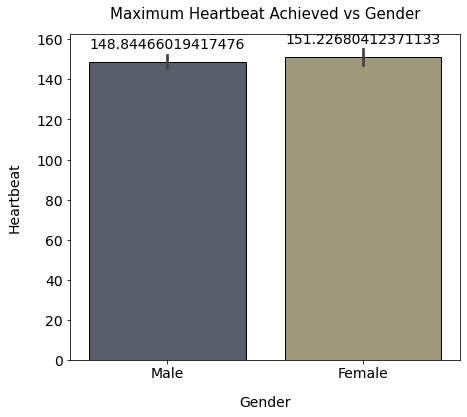

In [67]:
# Blood Pressure Based on Gender
plt.rcParams["figure.figsize"] = (7, 6)
ax = sns.barplot(x = 'Gender', y = 'thalach', data = data_hdda, order=['Male', 'Female'], palette = 'cividis', edgecolor = 'Black')
ax.set_title("Maximum Heartbeat Achieved vs Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 14, labelpad = 15)
ax.set_ylabel('Heartbeat', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
Maximum Heartbeat Achieved by Female (__151.22__) __>__ Maximum Heartbeat Achieved by Male (__148.84__)

#### 4.7.3 Maximum Heart Rate Achieved Based on Age Group

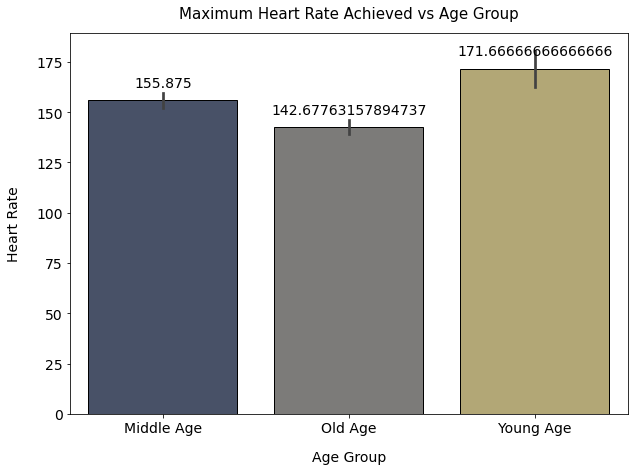

In [68]:
# Blood Pressure Based on Age Group
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.barplot(x = 'Age_Group', y = 'thalach', data = data_hdda, order=['Middle Age', 'Old Age', 'Young Age'], palette = 'cividis', edgecolor = 'Black')
ax.set_title("Maximum Heart Rate Achieved vs Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 14, labelpad = 15)
ax.set_ylabel('Heart Rate', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
__Heart Rate Based On Age Group:__
    
Young Age (__171.66__) __>__ Middle Age (__155.875__) __>__ Old Age (__142.67__)

### 4.8 Exercise Induced Angina

#### 4.8.1 Exercise Induced Angina vs Heart Disease

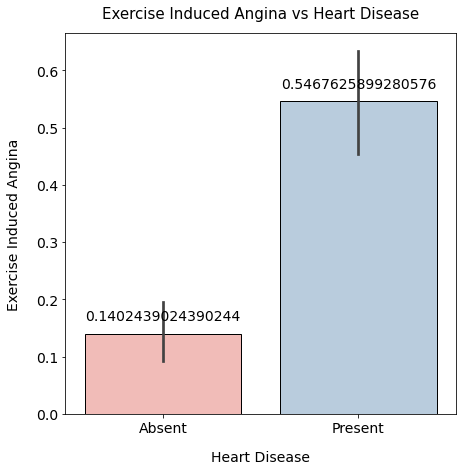

In [69]:
#  Exercise Induced Angina vs Heart Disease
plt.rcParams["figure.figsize"] = (7, 7)
ax = sns.barplot(x = 'Heart_Disease', y = 'exang', data = data_hdda, order=['Absent', 'Present'], palette = 'Pastel1', edgecolor = 'Black')
ax.set_title("Exercise Induced Angina vs Heart Disease", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Heart Disease', fontsize = 14, labelpad = 15)
ax.set_ylabel('Exercise Induced Angina', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
Exercise Induced Angina will worsen the condition of Heart Disease Population.

#### 4.8.2 Exercise Induced Angina vs Gender

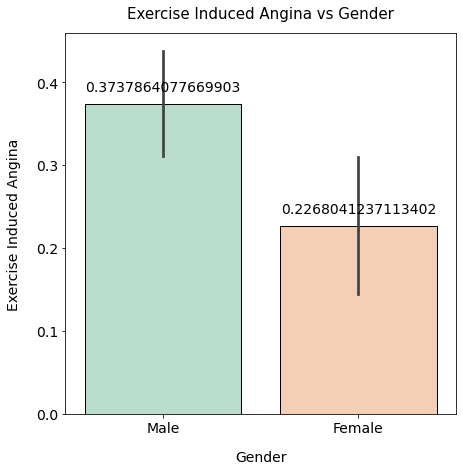

In [70]:
#  Exercise Induced Angina vs Gender
plt.rcParams["figure.figsize"] = (7, 7)
ax = sns.barplot(x = 'Gender', y = 'exang', data = data_hdda, order=['Male', 'Female'], palette = 'Pastel2', edgecolor = 'Black')
ax.set_title("Exercise Induced Angina vs Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 14, labelpad = 15)
ax.set_ylabel('Exercise Induced Angina', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
Exercise Induced Angina is high in Male as compared to Female.

#### 4.8.3 Exercise Induced Angina Based on Age Group

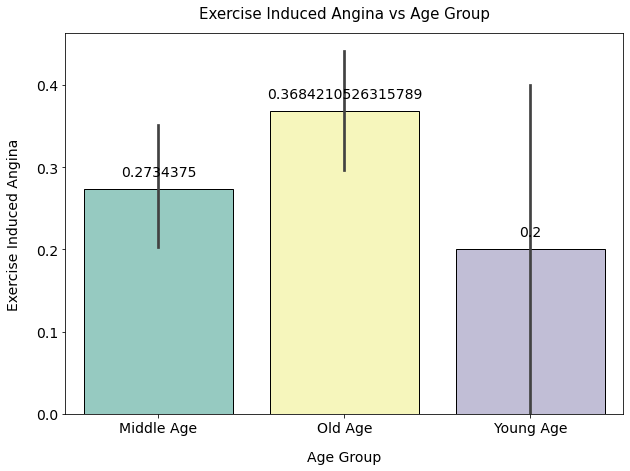

In [71]:
# Exercise Induced Angina Based on Age Group
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.barplot(x = 'Age_Group', y = 'exang', data = data_hdda, order=['Middle Age', 'Old Age', 'Young Age'], palette = 'Set3', edgecolor = 'Black')
ax.set_title("Exercise Induced Angina vs Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 14, labelpad = 15)
ax.set_ylabel('Exercise Induced Angina', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
Exercise Induced Angina condition is seen more in Old Age Group.

### 4.9 ST Depression

#### 4.9.1 ST Depression induced by Exercise vs Heart Disease

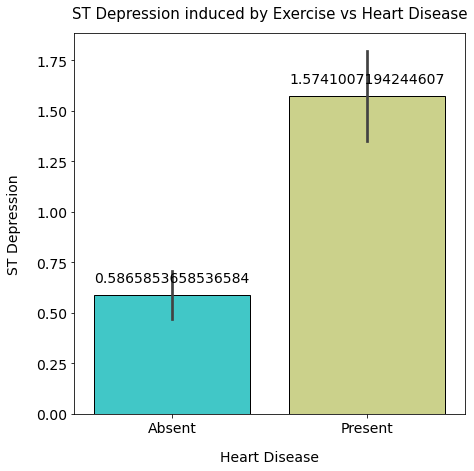

In [72]:
#  ST Depression induced by Exercise vs Heart Disease
plt.rcParams["figure.figsize"] = (7, 7)
ax = sns.barplot(x = 'Heart_Disease', y = 'oldpeak', data = data_hdda, order=['Absent', 'Present'], palette = 'rainbow', edgecolor = 'Black')
ax.set_title("ST Depression induced by Exercise vs Heart Disease", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Heart Disease', fontsize = 14, labelpad = 15)
ax.set_ylabel('ST Depression', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
ST Depression induced by Exercise is seen more in population with Heart Disease

#### 4.9.2 ST Depression induced by Exercise vs Gender

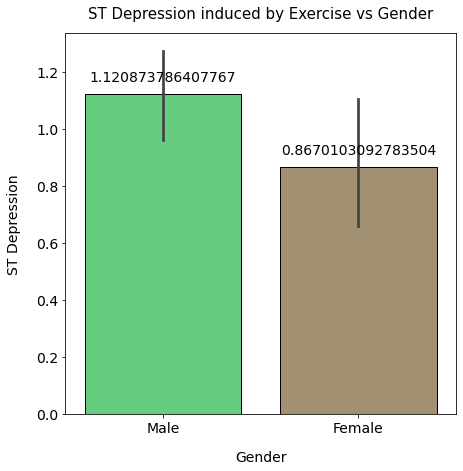

In [73]:
#  ST Depression induced by Exercise vs Gender
plt.rcParams["figure.figsize"] = (7, 7)
ax = sns.barplot(x = 'Gender', y = 'oldpeak', data = data_hdda, order=['Male', 'Female'], palette = 'terrain', edgecolor = 'Black')
ax.set_title("ST Depression induced by Exercise vs Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 14, labelpad = 15)
ax.set_ylabel('ST Depression', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
ST Depression induced by Exercise is higher in Male compared to Female.

#### 4.9.3 ST Depression induced by Exercise vs Age Group

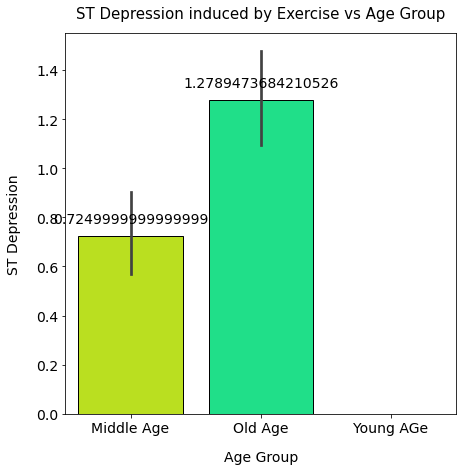

In [74]:
#  ST Depression induced by Exercise vs Age Group
plt.rcParams["figure.figsize"] = (7, 7)
ax = sns.barplot(x = 'Age_Group', y = 'oldpeak', data = data_hdda, order=['Middle Age', 'Old Age', 'Young AGe'], palette = 'gist_rainbow', edgecolor = 'Black')
ax.set_title("ST Depression induced by Exercise vs Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 14, labelpad = 15)
ax.set_ylabel('ST Depression', fontsize = 14, labelpad = 15)
# ax.set_xticklabels(('Absent', 'Present'), fontsize = 12)

plt.yticks(size=14)
plt.xticks(size=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
__ST Depression induced by Exercise vs Age Group:__
    
Old Age __>__ Middle Age __>__ Young Age

### 4.10 ST Exercise Peak

#### 4.10.1 ST Exercise Peak Vs Heart Disease

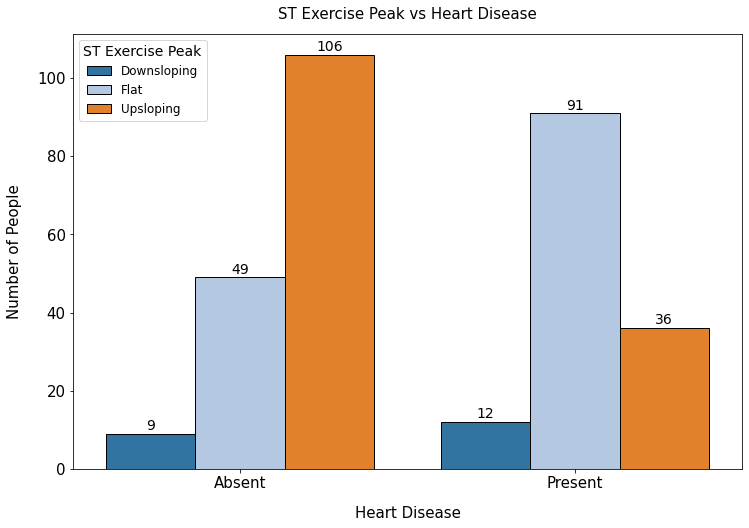

In [75]:
# ST Exercise Peak And Heart Disease
plt.figure(figsize=(12,8))
ax = sns.countplot(x = data_hdda['Heart_Disease'], hue = 'ST_Exercise_Peak', data = data_hdda, order=['Absent', 'Present'], palette = 'tab20', edgecolor = 'Black')
plt.title('ST Exercise Peak vs Heart Disease', fontsize = 15, pad = 15)
plt.xlabel('Heart Disease', fontsize = 15, labelpad = 15)
plt.ylabel('Number of People', fontsize = 15, labelpad = 15)

plt.yticks(size=15)
plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'ST Exercise Peak', title_fontsize = 14, labels=['Downsloping', 'Flat', 'Upsloping'], fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)

plt.show()

__OBSERVATION:__
    
ST Exercise Peak Slope seen in People with Heart Disease Diagnosed:

Flat __>__ Upsloping __>__ Downsloping

#### 4.10.2 ST Exercise Peak Based on Gender and Age Group

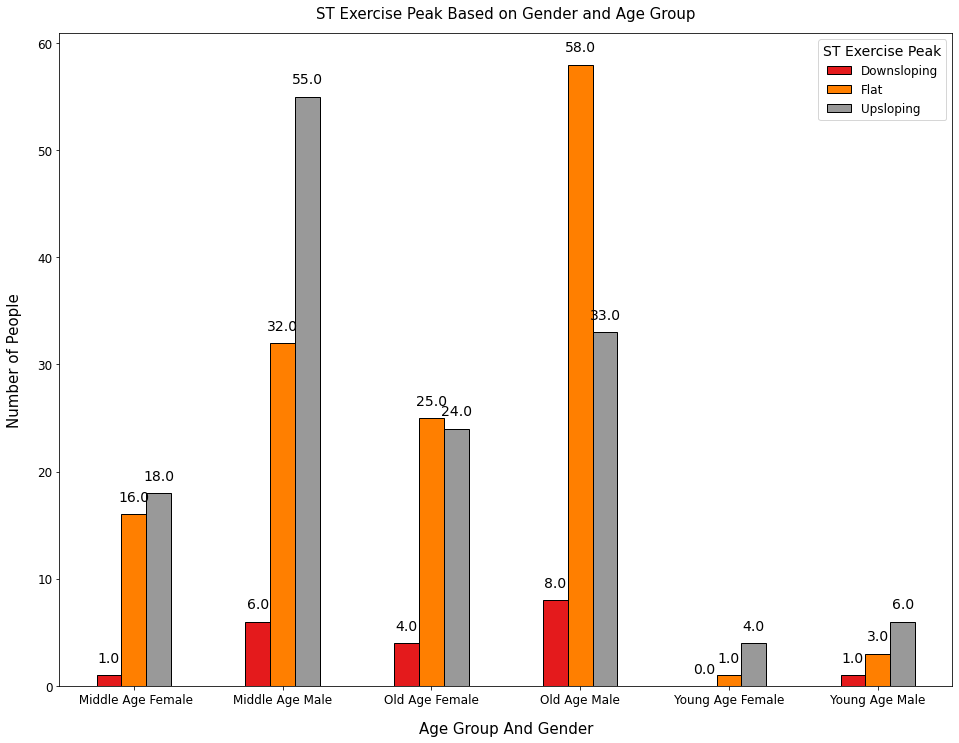

In [76]:
# ST Exercise Peak Based on Gender and Age Group
Age_Group_Gender = data_hdda.groupby(['Age_Group', 'Gender'])['ST_Exercise_Peak'].value_counts().unstack()

plt.rcParams["figure.figsize"] = (16, 12)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'Set1', rot = 0, edgecolor = 'Black', fontsize = 12)
ax.set_title("ST Exercise Peak Based on Gender and Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group And Gender', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels((' Middle Age Female', 'Middle Age Male', 'Old Age Female', 'Old Age Male', 'Young Age Female', 'Young Age Male'), fontsize = 12)

# plt.yticks(size=15)
# plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'ST Exercise Peak', fontsize = 12, labels=['Downsloping', 'Flat', 'Upsloping'], title_fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
__Slope Type seen based on Age Group wise:__
    
Old Age: Flat __>__ Upsloping __>__ Downsloping

Middle Age: Upsloping __>__ Flat __>__ Downsloping

Young Age: Upsloping __>__ Flat __>__ Downsloping
    
__Slope Type seen most in Gender wise:__

Male __>__ Female 

### 4.11 Thallium Stress Test

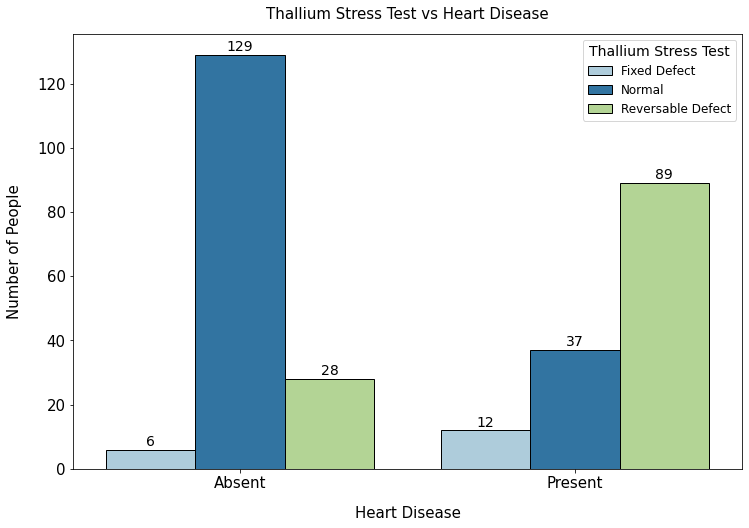

In [77]:
# Thallium Stress Test And Heart Disease
plt.figure(figsize=(12,8))
ax = sns.countplot(x = data_hdda['Heart_Disease'], hue = 'Thallium_Stress_Test', data = data_hdda, order=['Absent', 'Present'], palette = 'Paired', edgecolor = 'Black')
plt.title('Thallium Stress Test vs Heart Disease', fontsize = 15, pad = 15)
plt.xlabel('Heart Disease', fontsize = 15, labelpad = 15)
plt.ylabel('Number of People', fontsize = 15, labelpad = 15)

plt.yticks(size=15)
plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Thallium Stress Test', title_fontsize = 14, labels=['Fixed Defect', 'Normal', 'Reversable Defect'], fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)

plt.show()

__OBSERVATION:__
    
In Heart Disease Diagnosed people taking Thallium Stress Test the Reversable Defect is seen most followed by Normal and Fixed Defect.

#### 4.11.2 Thallium Stress Test Based on Gender

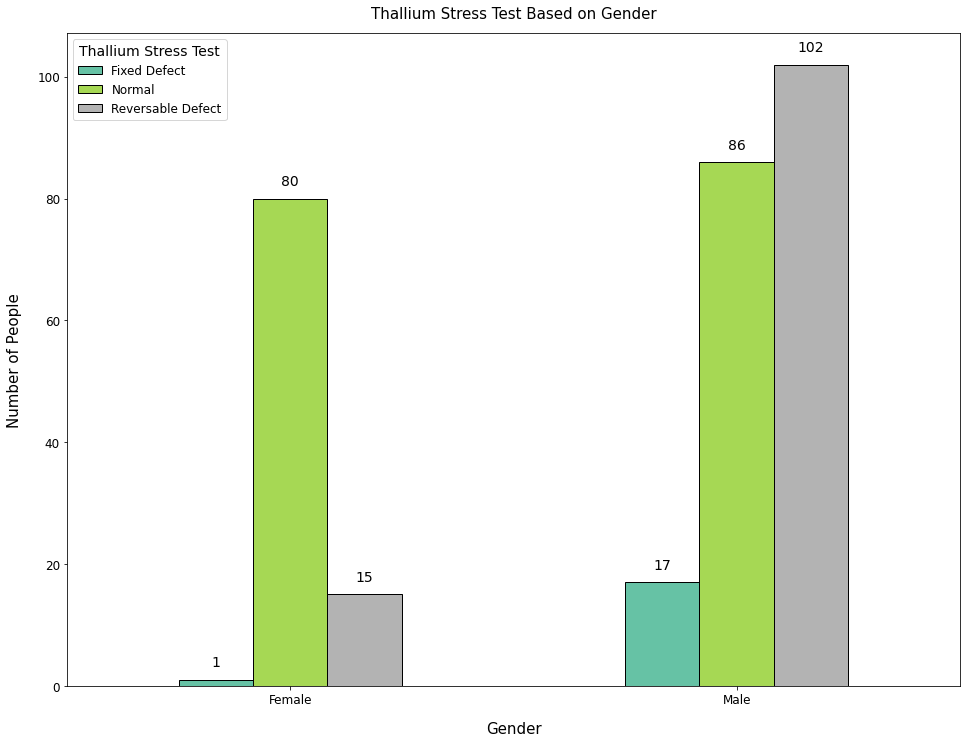

In [78]:
# Thallium Stress Test Based on Gender 
Age_Group_Gender = data_hdda.groupby('Gender')['Thallium_Stress_Test'].value_counts().unstack()

plt.rcParams["figure.figsize"] = (16, 12)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'Set2', rot = 0, edgecolor = 'Black', fontsize = 12)
ax.set_title("Thallium Stress Test Based on Gender", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Gender', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Female', 'Male'), fontsize = 12)

# plt.yticks(size=15)
# plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Thallium Stress Test', fontsize = 12, labels=['Fixed Defect', 'Normal', 'Reversable Defect'], title_fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__

__Thallium Stress Test Defects seen Gender wise:__

Male __>__ Female 

#### 4.11.3 Thallium Stress Test Based on Age Group

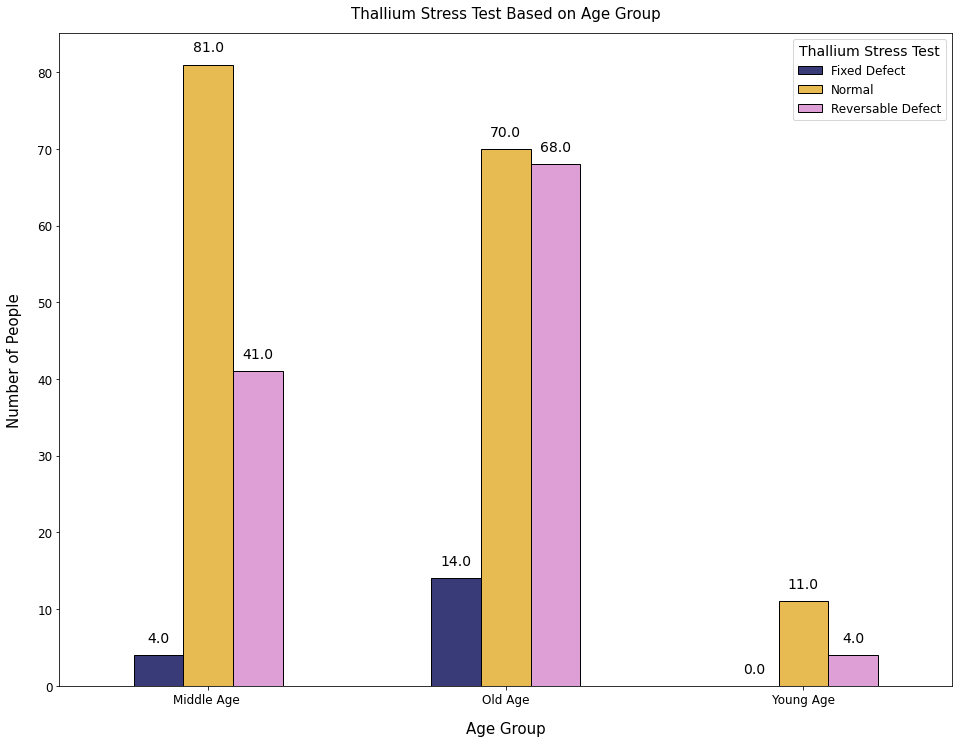

In [79]:
# Thallium Stress Test Based on Age Group
Age_Group_Gender = data_hdda.groupby('Age_Group')['Thallium_Stress_Test'].value_counts().unstack()

plt.rcParams["figure.figsize"] = (16, 12)
ax = Age_Group_Gender.plot(kind ='bar', stacked = False, colormap = 'tab20b', rot = 0, edgecolor = 'Black', fontsize = 12)
ax.set_title("Thallium Stress Test Based on Age Group", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Age Group', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People', fontsize = 15, labelpad = 15)
ax.set_xticklabels(('Middle Age ', 'Old Age', 'Young Age'), fontsize = 12)

# plt.yticks(size=15)
# plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Thallium Stress Test', fontsize = 12, labels=['Fixed Defect', 'Normal', 'Reversable Defect'], title_fontsize = 14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', fontsize = 14, rotation = 0)

plt.show()

__OBSERVATION:__
    
__Thallium Stress Test Defects based on Age Group wise:__
    
Fixed Defect and Reversable Defect: Old Age __>__ Middle Age 

### 4.12 Major Vessels

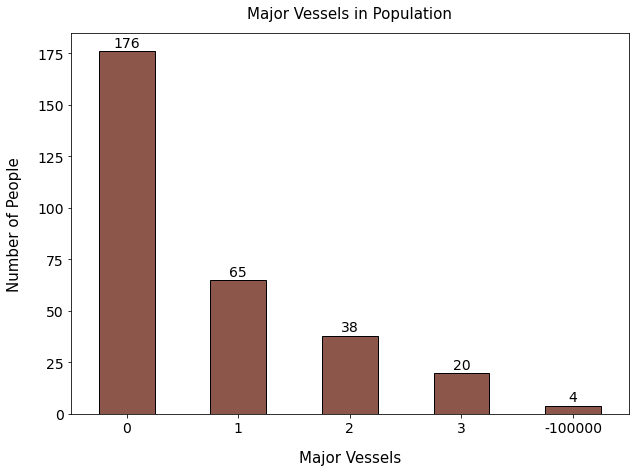

In [80]:
# Bar Chart for Chest Pain Type
Chest_Pain_Type_cpt = data_hdda['ca'].value_counts()
plt.figure(figsize=(10, 7))
ax = Chest_Pain_Type_cpt.plot(kind='bar', rot=0, color="tab:brown", edgecolor = 'Black', fontsize = 14)
ax.set_title("Major Vessels in Population", y = 1, fontsize = 15, pad = 15)
ax.set_xlabel('Major Vessels', fontsize = 15, labelpad = 15)
ax.set_ylabel('Number of People',fontsize = 15, labelpad = 15)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)    
plt.show()

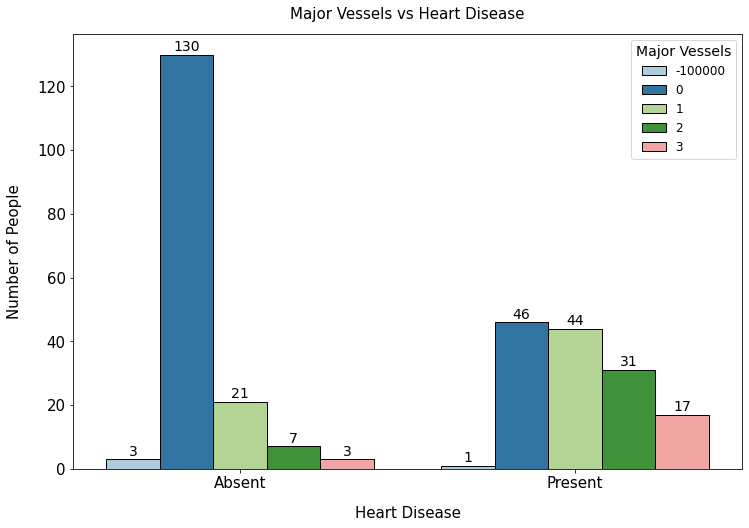

In [81]:
# Thallium Stress Test And Heart Disease
plt.figure(figsize=(12,8))
ax = sns.countplot(x = data_hdda['Heart_Disease'], hue = 'ca', data = data_hdda, order=['Absent', 'Present'], palette = 'Paired', edgecolor = 'Black')
plt.title('Major Vessels vs Heart Disease', fontsize = 15, pad = 15)
plt.xlabel('Heart Disease', fontsize = 15, labelpad = 15)
plt.ylabel('Number of People', fontsize = 15, labelpad = 15)

plt.yticks(size=15)
plt.xticks(size=15)

# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
plt.legend(title = 'Major Vessels', title_fontsize = 14,  fontsize = 12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', fontsize = 14)

plt.show()

__OBSERVATION:__
    
Most of the Heart Disease Diagnosed People have some major vessels and narrowing of major vessels will increase the risk of Heart Diseases.

### 4.13 Correlation Between Variables

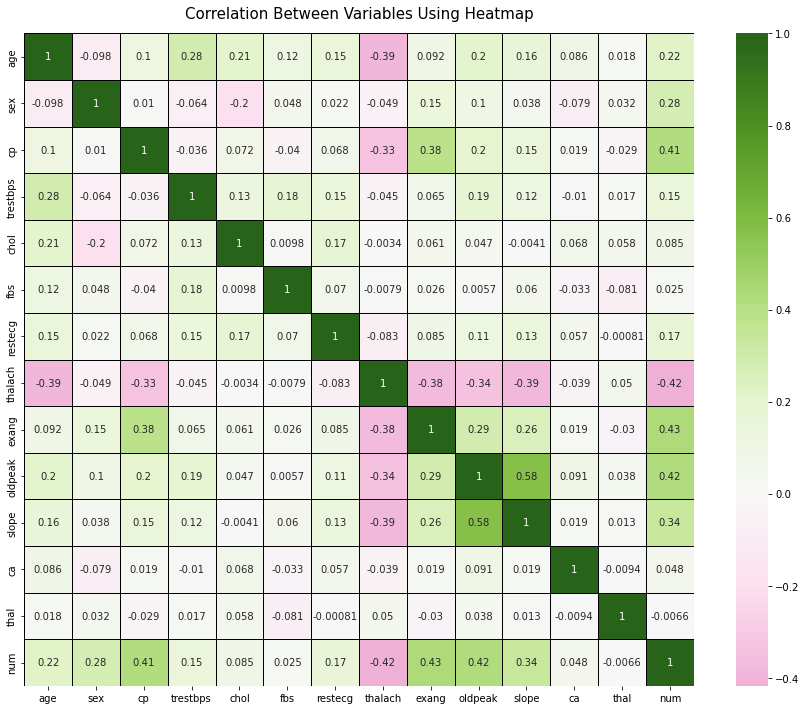

In [82]:
# Heatmap for Finding Correlation between Variables
plt.figure(figsize = (15, 12))
ax = plt.axes()
sns.heatmap(data_hdda.corr(), annot = True, linewidth = 0.5, linecolor = 'Black', cmap = 'PiYG', center = 0)
ax.set_title("Correlation Between Variables Using Heatmap", y = 1, fontsize = 15, pad = 15)
plt.show()

__OBSERVATION:__
    
    
__Target Variable (num)__ is balanced by th number of people diagnosed with Heart Disease and those who are not.


__Variables which has significant impact on Heart Disease Diagnosis:__

    1. Age: Young/Middle/old : Usually Population belonging to Old and Middle Age are dignosed more with Heart Disease

    2. Sex: Male/Female: Males are more likely to be diagnosed with Heart Disease than Female

    3. Exercise Induced Angina (exang): Angina means reduced blood flow to heart, Angina induced due to exercise worsen the  heart disease risk/condition.

    4. Maximum Heart Rate Acheived (thalach)

    5. Resting Blood Pressure (trestbps)

    6. ST Depression (oldpeak)

    7. Chest Pain Type: Asymptomatic Chest Pain is more common among the people having Heart Disease, and the least dangerous among chest pain type is Typical Angina.

    8. Slope Type (slope): The slope seen most are Flat and Upsloping comapred to Downsloping.

    9. Major Vessels (ca): Diameters of Major Vessels are important as they carry oxygen to Heart and narrowing of major vessels will increase the risk of Heart Diseases.


__Variables which has no signifcance:__


    1. Serum Cholestrol Level (chol)
    
    2. Fasting Blood Sugar (fbs)
